<a href="https://colab.research.google.com/github/kimchuannn/optimization_deeplearning_timeseriesforecast/blob/main/optimization_and_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Library and Dataset

In [ ]:
# Importing the Required Libraries
import pandas as pd                # For Data Manipulation and Analysis
import numpy as np                 # For Mathematical Operations on Arrays
import seaborn as sns              # For Data Visualisation
import matplotlib.pyplot as plt    # For Graphical Plotting
import sklearn as sklearn          # For Machine Learning and Statistical Modelling
import imblearn as imblearn        # For Dealing with Imbalanced Class in Classification
import warnings                    # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the Dataset
data = pd.read_csv('/content/energy_dataset.csv')
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


# Data Preprocessing and Exploratory Data Analysis

## EDA

### Basic Understanding on Dataset

In [ ]:
data.shape

(35064, 29)

In [ ]:
data.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

### Descriptive Statistical Summary

In [ ]:
# Only for Numerical Variables
data.describe().round(2)

# Compare mean & std
# if MEAN > STD, then the VAR(s) has NO OUTLIERS
# Else, the VAR has OULIERS

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.00,35046.00,35046.0,35046.00,35046.00,35045.00,35046.0,35046.0,35046.0,0.0,...,35045.00,35046.0,35046.00,35064.00,0.0,35064.00,35064.00,35028.00,35064.00,35064.00
mean,383.51,448.06,0.0,5622.74,4256.07,298.32,0.0,0.0,0.0,NaN,...,269.45,0.0,5464.48,1439.07,NaN,5471.22,28712.13,28696.94,49.87,57.88
std,85.35,354.57,0.0,2201.83,1961.60,52.52,0.0,0.0,0.0,NaN,...,50.20,0.0,3213.69,1677.70,NaN,3176.31,4594.10,4574.99,14.62,14.20
min,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,...,0.00,0.0,0.00,0.00,NaN,237.00,18105.00,18041.00,2.06,9.33
25%,333.00,0.00,0.0,4126.00,2527.00,263.00,0.0,0.0,0.0,NaN,...,240.00,0.0,2933.00,69.00,NaN,2979.00,24793.75,24807.75,41.49,49.35
50%,367.00,509.00,0.0,4969.00,4474.00,300.00,0.0,0.0,0.0,NaN,...,279.00,0.0,4849.00,576.00,NaN,4855.00,28906.00,28901.00,50.52,58.02
75%,433.00,757.00,0.0,6429.00,5838.75,330.00,0.0,0.0,0.0,NaN,...,310.00,0.0,7398.00,2636.00,NaN,7353.00,32263.25,32192.00,60.53,68.01
max,592.00,999.00,0.0,20034.00,8359.00,449.00,0.0,0.0,0.0,NaN,...,357.00,0.0,17436.00,5836.00,NaN,17430.00,41390.00,41015.00,101.99,116.80


In [ ]:
from statistics import mode
print(data.mode())

                            time  generation biomass  \
0      2015-01-01 00:00:00+01:00               361.0   
1      2015-01-01 01:00:00+01:00                 NaN   
2      2015-01-01 02:00:00+01:00                 NaN   
3      2015-01-01 03:00:00+01:00                 NaN   
4      2015-01-01 04:00:00+01:00                 NaN   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00                 NaN   
35060  2018-12-31 20:00:00+01:00                 NaN   
35061  2018-12-31 21:00:00+01:00                 NaN   
35062  2018-12-31 22:00:00+01:00                 NaN   
35063  2018-12-31 23:00:00+01:00                 NaN   

       generation fossil brown coal/lignite  \
0                                       0.0   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...  

In [ ]:
from statistics import median
print(data.median())

generation biomass                               367.00
generation fossil brown coal/lignite             509.00
generation fossil coal-derived gas                 0.00
generation fossil gas                           4969.00
generation fossil hard coal                     4474.00
generation fossil oil                            300.00
generation fossil oil shale                        0.00
generation fossil peat                             0.00
generation geothermal                              0.00
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption       68.00
generation hydro run-of-river and poundage       906.00
generation hydro water reservoir                2164.00
generation marine                                  0.00
generation nuclear                              6566.00
generation other                                  57.00
generation other renewable                        88.00
generation solar                                

In [ ]:
data.skew()

generation biomass                             0.421013
generation fossil brown coal/lignite          -0.046831
generation fossil coal-derived gas             0.000000
generation fossil gas                          1.615447
generation fossil hard coal                   -0.073691
generation fossil oil                          0.064469
generation fossil oil shale                    0.000000
generation fossil peat                         0.000000
generation geothermal                          0.000000
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption    2.130588
generation hydro run-of-river and poundage     0.500928
generation hydro water reservoir               0.897036
generation marine                              0.000000
generation nuclear                            -0.691683
generation other                              -0.506196
generation other renewable                    -0.216073
generation solar                               1

### Check Duplicate Values

In [ ]:
data.duplicated().sum()

0

### Check Missing Value

In [ ]:
# Check Missing Value
data.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

### Data Visualisation

#### Univariate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8eb6dcae10>,
      dtype=object)

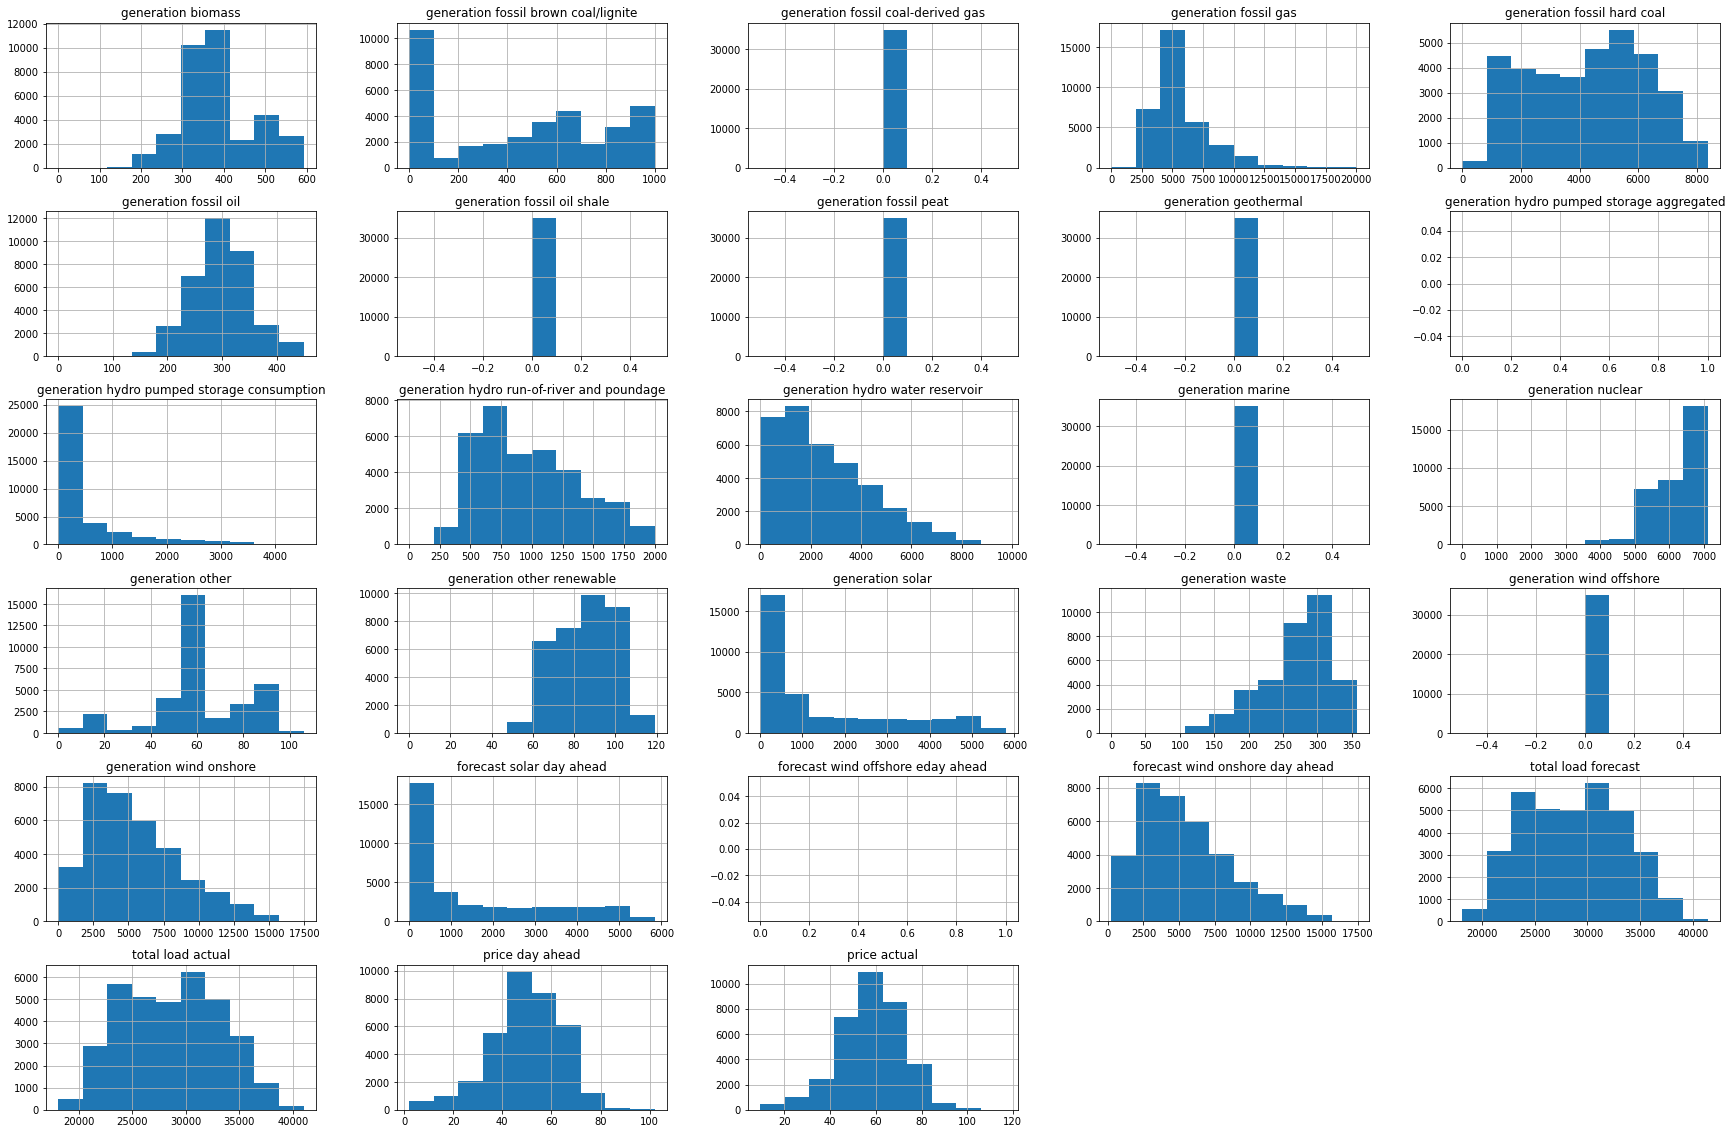

In [ ]:
plt.rcParams['figure.figsize']=(30, 20)
data.hist()

#### Bivariate

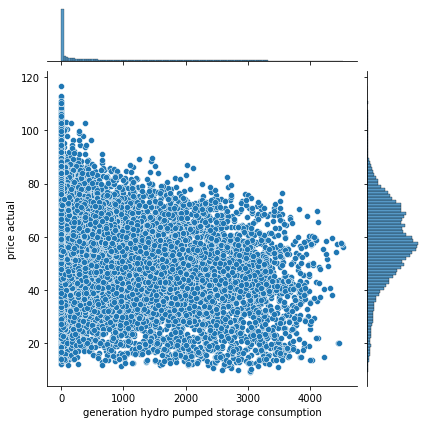

In [ ]:
import seaborn as sns

sns.jointplot(x = 'generation hydro pumped storage consumption', y = 'price actual', data = data)

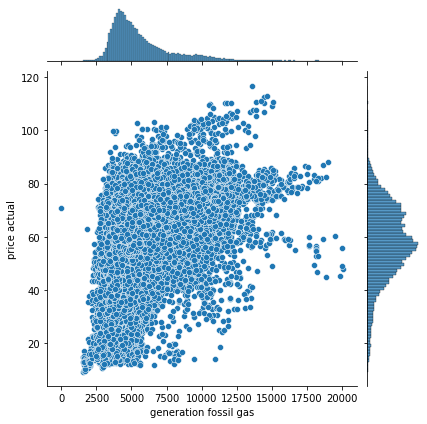

In [ ]:
import seaborn as sns

sns.jointplot(x = 'generation fossil gas', y = 'price actual', data = data)

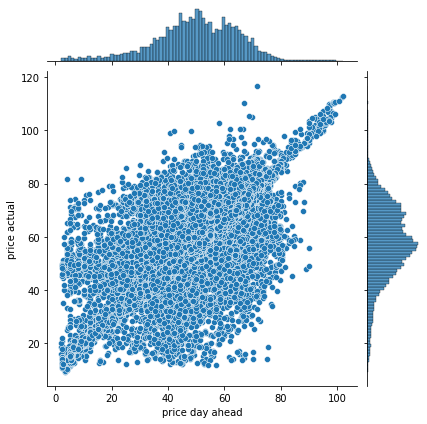

In [ ]:
import seaborn as sns

sns.jointplot(x = 'price day ahead', y = 'price actual', data = data)

## Data Preprocessing

### Drop Unusable Column

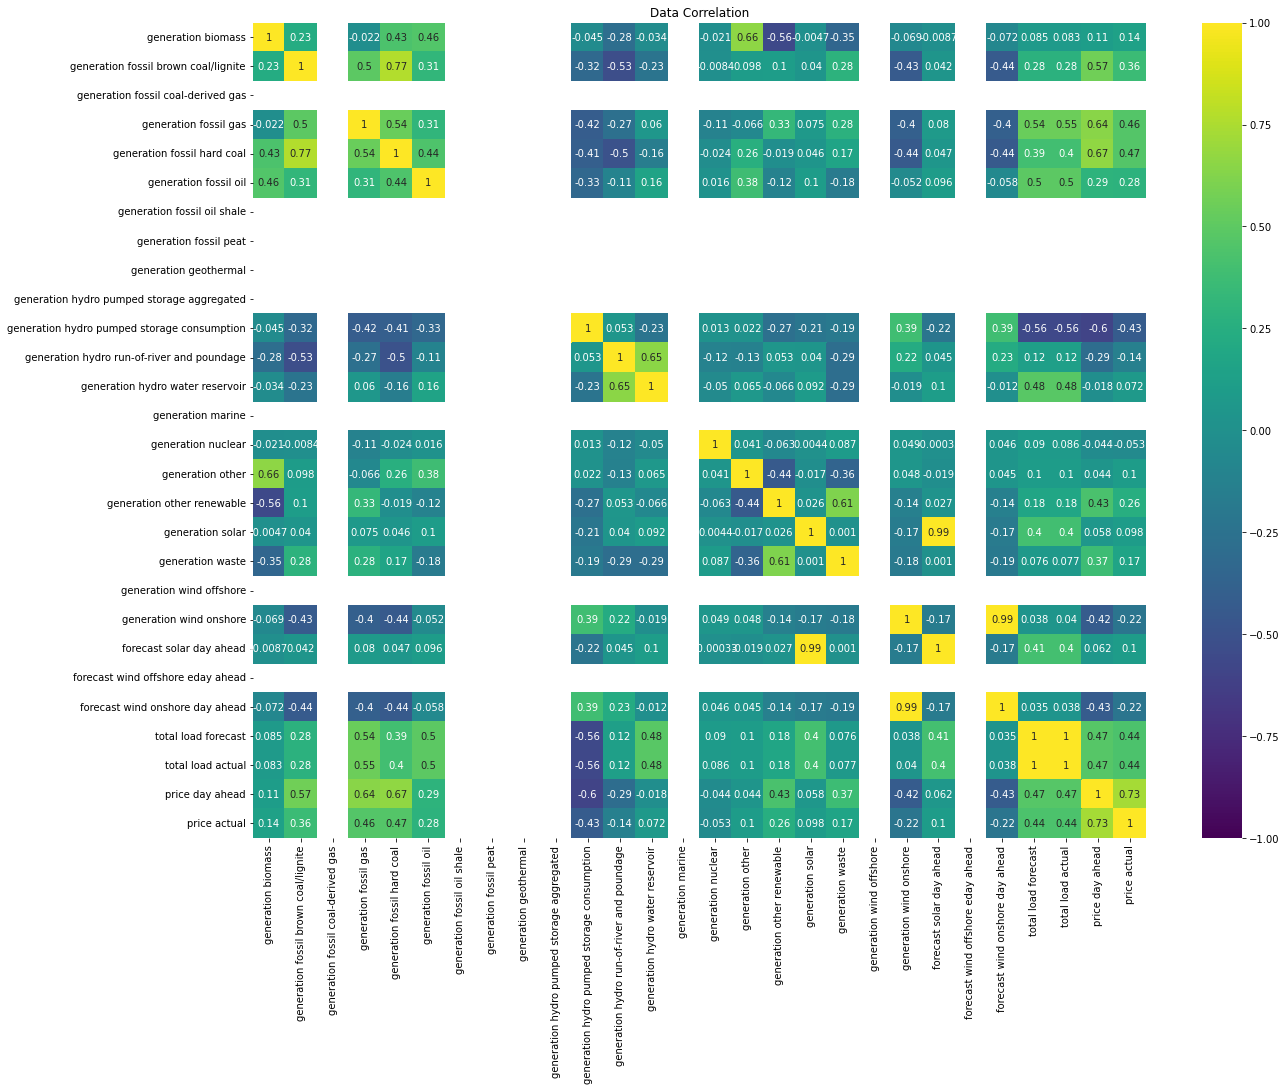

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = True, cmap = 'viridis')
plt.title('Data Correlation')
plt.show()

In [ ]:
# Drop unusable columns (too many missing value)

data = data.drop(['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat', 'generation geothermal',
                  'generation hydro pumped storage aggregated', 'generation marine',
                  'generation wind offshore', 'forecast wind offshore eday ahead'], axis=1)

data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


### Feature Reduction - Pairwise Correlation

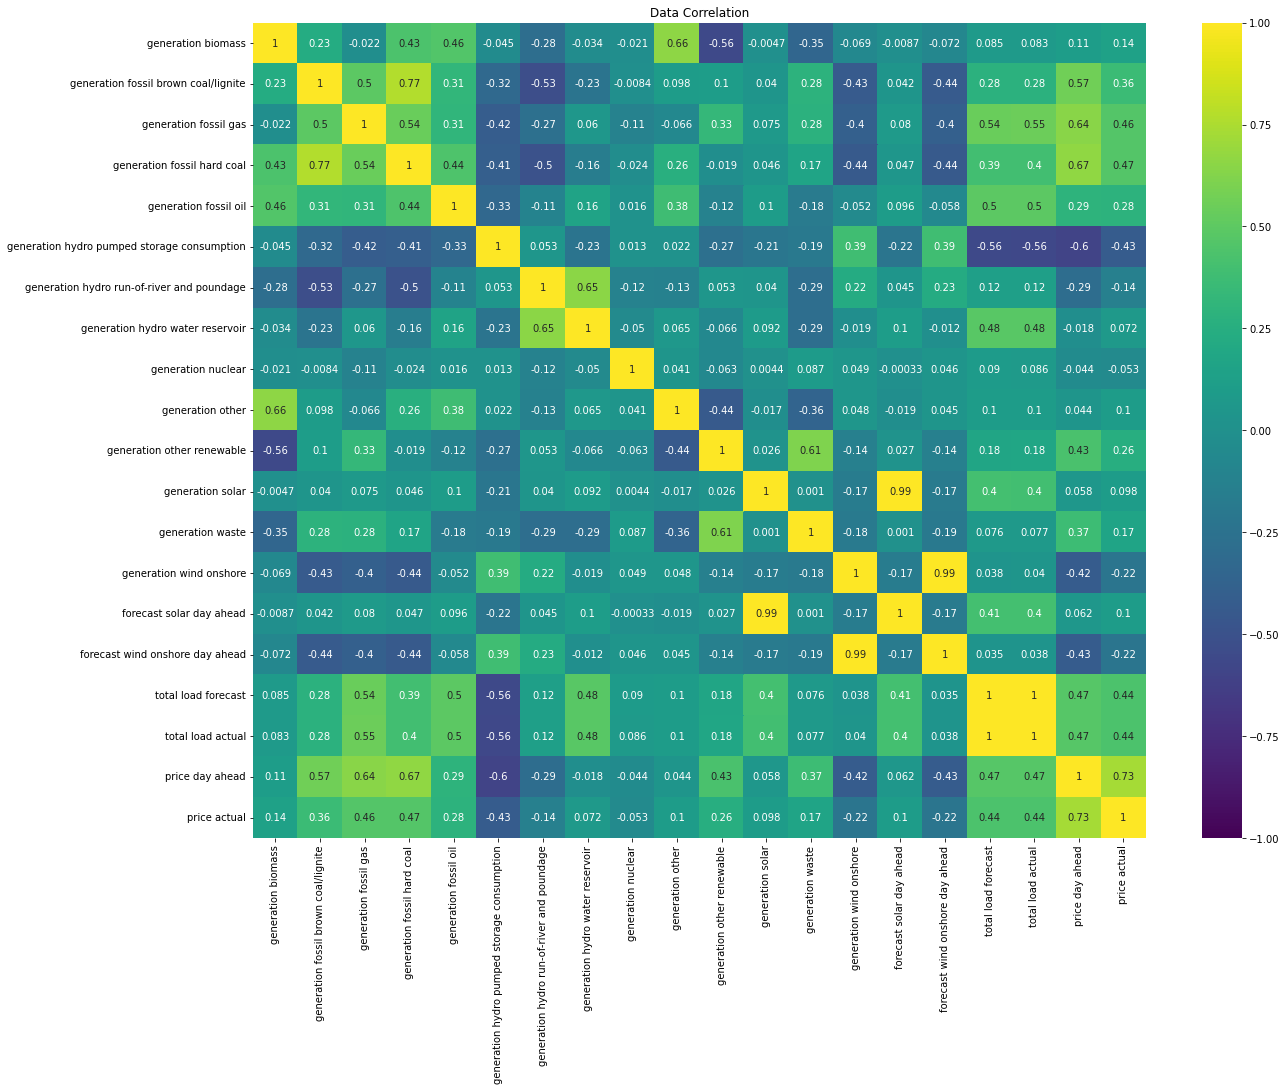

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = True, cmap = 'viridis')
plt.title('Data Correlation')
plt.show()

In [ ]:
# Pairwise correlation (between features)

data = data.drop(['total load forecast', 'forecast wind onshore day ahead', 'forecast solar day ahead', 'generation biomass',
                  'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation other renewable',
                  'generation nuclear', 'generation fossil oil', 'generation fossil gas'], axis=1)

data.head()

,time,generation fossil brown coal/lignite,generation fossil hard coal,generation hydro pumped storage consumption,generation other,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,329.0,4821.0,863.0,43.0,49.0,196.0,6378.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,328.0,4755.0,920.0,43.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,323.0,4581.0,1164.0,43.0,50.0,196.0,5461.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,254.0,4131.0,1503.0,43.0,50.0,191.0,5238.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,187.0,3840.0,1826.0,43.0,42.0,189.0,4935.0,20264.0,38.41,56.04


### Handle Outliers

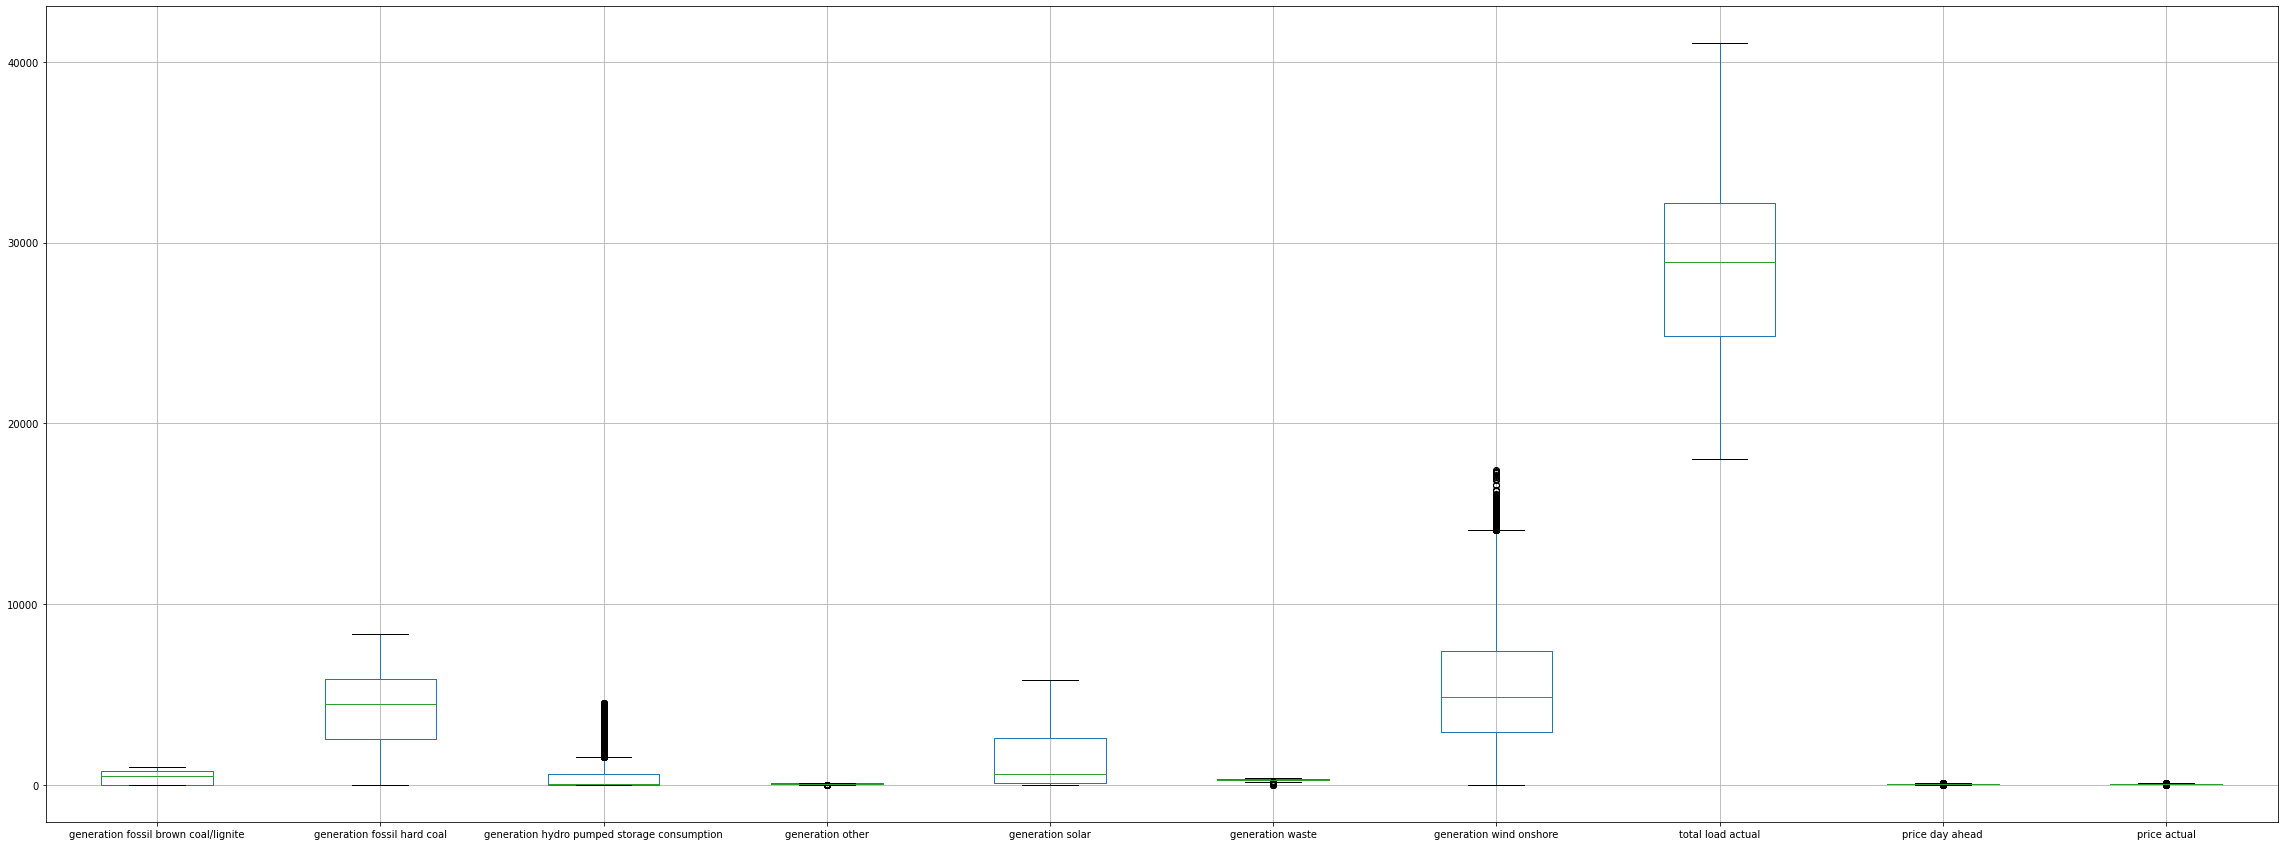

In [ ]:
plt.rcParams['figure.figsize'] = (40, 15)

# Plotting Boxplot to Detect Outlier
data.boxplot()

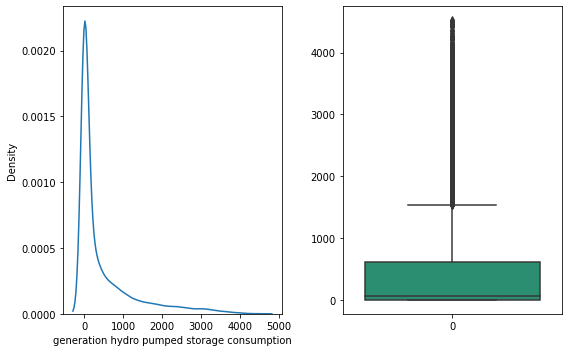

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.kdeplot(data = data['generation hydro pumped storage consumption'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = data['generation hydro pumped storage consumption'], palette="Dark2")
plt.tight_layout()
plt.show()

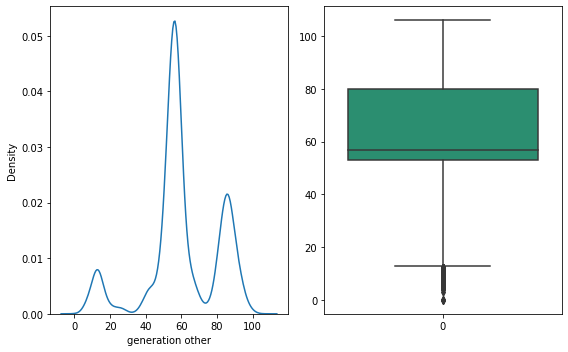

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.kdeplot(data = data['generation other'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = data['generation other'], palette="Dark2")
plt.tight_layout()
plt.show()

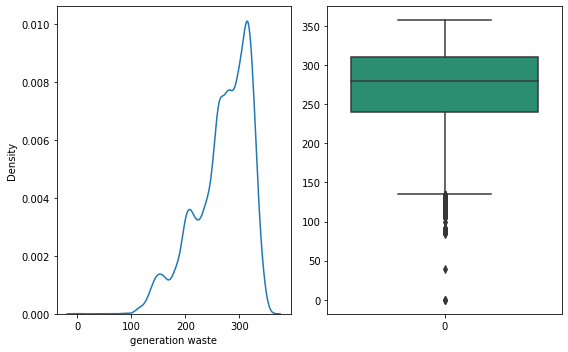

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.kdeplot(data = data['generation waste'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = data['generation waste'], palette="Dark2")
plt.tight_layout()
plt.show()

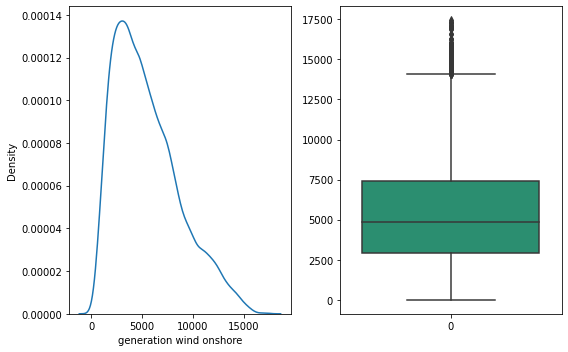

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.kdeplot(data = data['generation wind onshore'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = data['generation wind onshore'], palette="Dark2")
plt.tight_layout()
plt.show()

Box-Cox Transformation process of generation hydro pumped storage consumption is completed


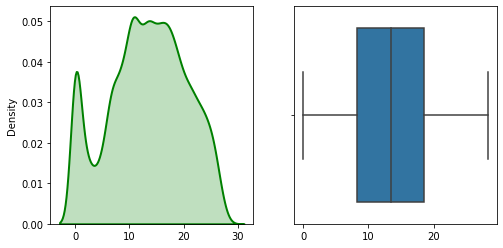

Box-Cox Transformation process of generation other is completed


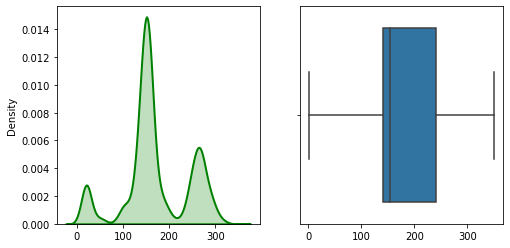

Box-Cox Transformation process of generation waste is completed


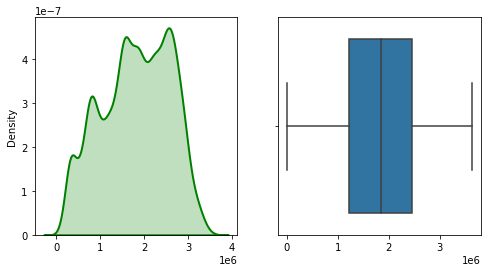

Box-Cox Transformation process of generation wind onshore is completed


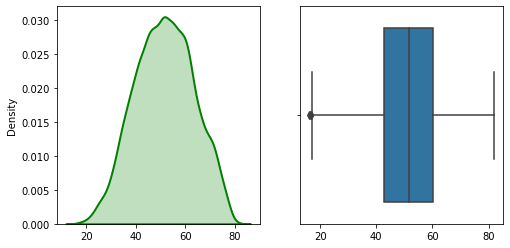

In [ ]:
from scipy import stats
plt.rcParams['figure.figsize'] = (8, 4)

# Transform Training Data and Save lambda Value
df_list = ['generation hydro pumped storage consumption', 'generation other', 'generation waste', 'generation wind onshore']

for col in df_list:

    if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':

        # Data must be POSITIVE

        pos_data = data[col][data[col] > 0]
        col_data, fitted_lambda = stats.boxcox(pos_data)

        # Create axes to draw plots

        fig, ax = plt.subplots(1,2)

        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2},
                     label = 'Normal', color = 'green', ax = ax[0])
        data.loc[data[col] > 0, col] = col_data
        print('Box-Cox Transformation process of {} is completed'.format(col))

        plt.subplot(122)

        sns.boxplot(col_data)

        plt.show()

### Covert Datatype

In [ ]:
# Convert time to datetime object and set as index

data['time'] = pd.to_datetime(data['time'], utc = True, infer_datetime_format = True)
data = data.set_index('time')

In [ ]:
# see first 5 rows
data.head()

,generation fossil brown coal/lignite,generation fossil hard coal,generation hydro pumped storage consumption,generation other,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,
2014-12-31 23:00:00+00:00,329.0,4821.0,17.423847,106.339672,49.0,701685.107939,56.984473,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,328.0,4755.0,17.765295,106.339672,50.0,691914.157044,55.358132,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,323.0,4581.0,19.068522,106.339672,50.0,701685.107939,53.853937,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,254.0,4131.0,20.572903,106.339672,50.0,653695.761670,53.041337,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,187.0,3840.0,21.783955,106.339672,42.0,635101.170549,51.900117,20264.0,38.41,56.04


### Handle Missing Values

In [ ]:
# Check Missing Value
data.isnull().sum()

generation fossil brown coal/lignite           18
generation fossil hard coal                    18
generation hydro pumped storage consumption    19
generation other                               18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [ ]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series
    created by the user. The user can define either the 'df' and the 'column'
    or the 'series' and additionally, can also define the 'label', the
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

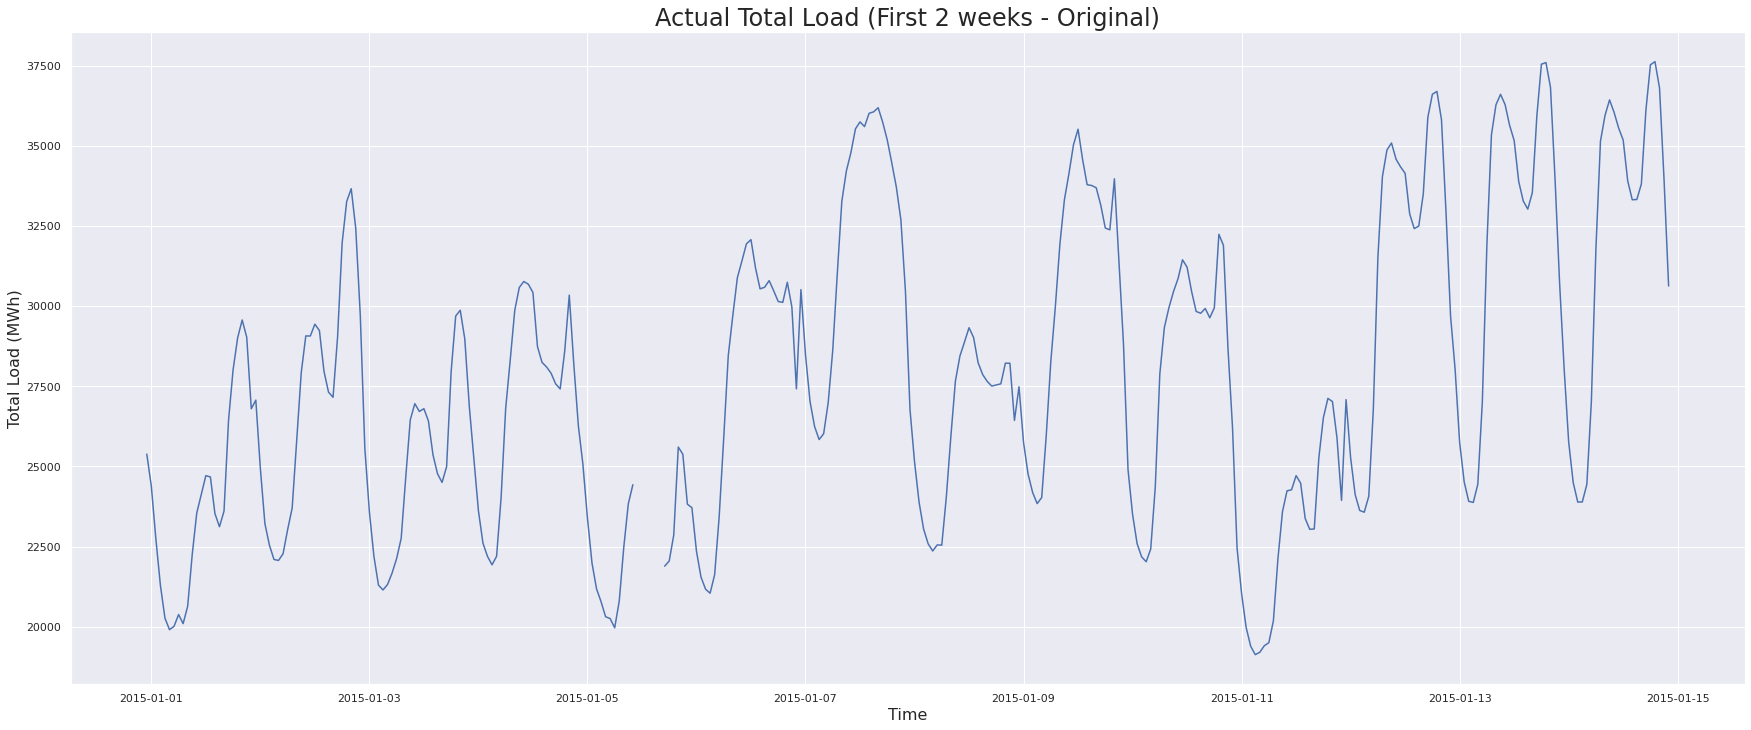

In [ ]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=data, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [ ]:
# Display the rows with null values

data[data.isnull().any(axis=1)].tail()

,generation fossil brown coal/lignite,generation fossil hard coal,generation hydro pumped storage consumption,generation other,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,
2016-10-27 21:00:00+00:00,554.0,5690.0,NaN,158.005185,70.0,2.233404e+06,44.238588,26583.0,55.70,62.84
2017-11-14 11:00:00+00:00,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,NaN,60.53,66.17
2017-11-14 18:00:00+00:00,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,NaN,68.05,75.45
2018-06-11 16:00:00+00:00,506.0,5360.0,0.0,136.760106,170.0,1.671408e+06,64.985491,NaN,69.87,64.93
2018-07-11 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.01,69.79


In [ ]:
# Fill null values using interpolation

data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
# Check Missing Value
data.isnull().sum()

generation fossil brown coal/lignite           0
generation fossil hard coal                    0
generation hydro pumped storage consumption    0
generation other                               0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

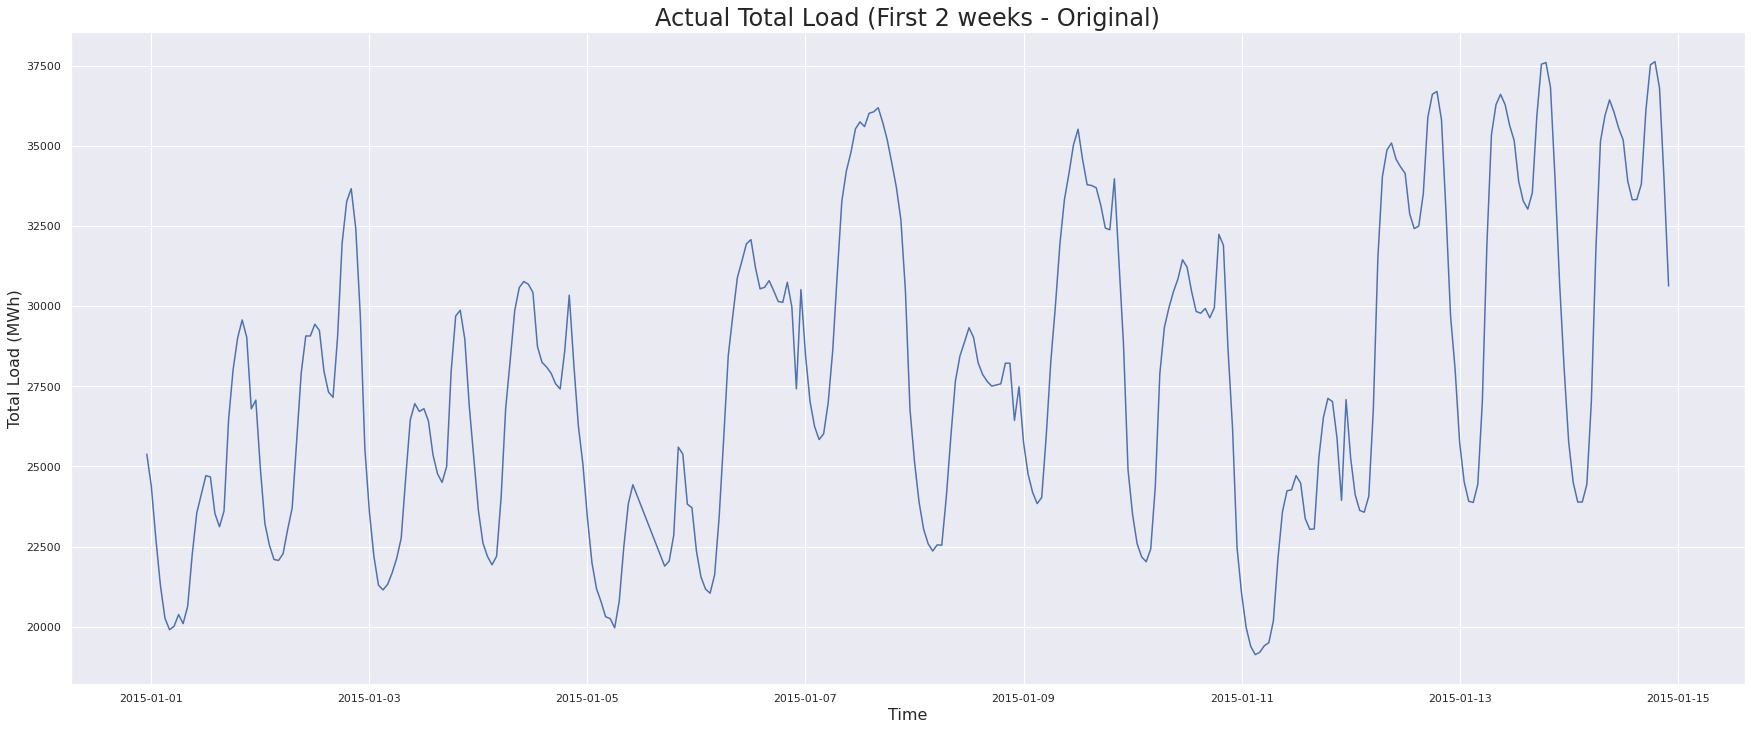

In [ ]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=data, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

### Variable Assignment for IV and TV

In [ ]:
x = data.iloc[:, 0:9].values
y = data.iloc[:, 9].values

In [ ]:
y

array([65.41, 64.92, 64.48, ..., 74.3 , 69.89, 69.88])

In [ ]:
x

array([[3.29000000e+02, 4.82100000e+03, 1.74238467e+01, ...,
        5.69844733e+01, 2.53850000e+04, 5.01000000e+01],
       [3.28000000e+02, 4.75500000e+03, 1.77652954e+01, ...,
        5.53581321e+01, 2.43820000e+04, 4.81000000e+01],
       [3.23000000e+02, 4.58100000e+03, 1.90685222e+01, ...,
        5.38539372e+01, 2.27340000e+04, 4.73300000e+01],
       ...,
       [0.00000000e+00, 2.42200000e+03, 6.58548626e+00, ...,
        4.57738501e+01, 2.80710000e+04, 6.68800000e+01],
       [0.00000000e+00, 2.29300000e+03, 8.81080360e+00, ...,
        4.61697099e+01, 2.58010000e+04, 6.39300000e+01],
       [0.00000000e+00, 2.16600000e+03, 8.81080360e+00, ...,
        4.64755562e+01, 2.44550000e+04, 6.42700000e+01]])

### Feature Scaling - Normalisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64d5f30fd0>,
      dtype=object)

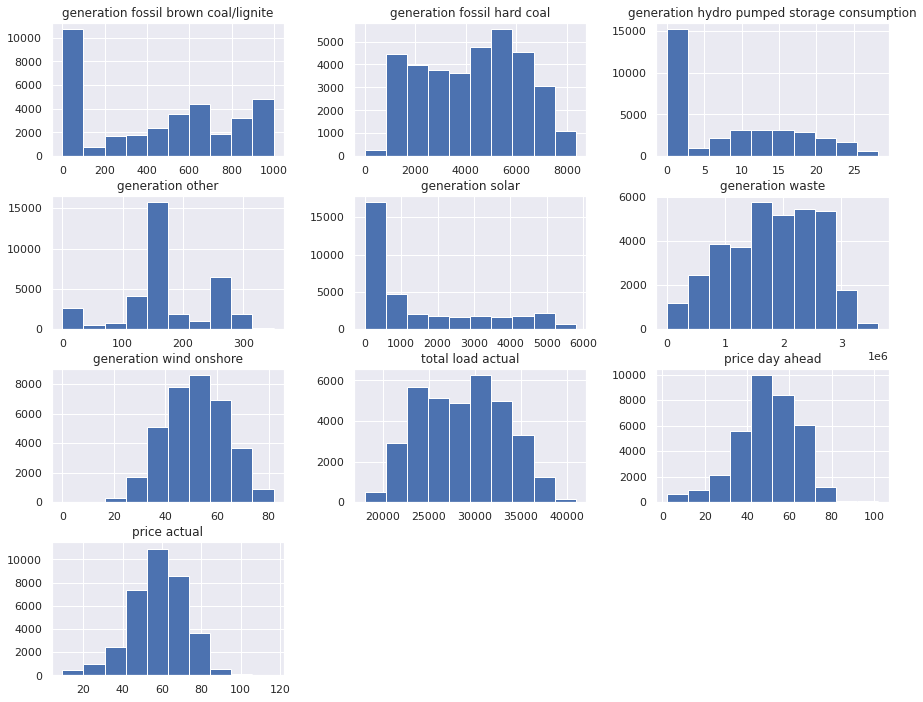

In [ ]:
plt.rcParams['figure.figsize']=(15, 12)
data.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# For INPUT VAR only
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)
x_norm # X Normalisation

array([[0.32932933, 0.57674363, 0.61653816, ..., 0.69577966, 0.31966571,
        0.48073652],
       [0.32832833, 0.56884795, 0.62862023, ..., 0.67592206, 0.27600766,
        0.46072251],
       [0.32332332, 0.54803206, 0.67473456, ..., 0.65755586, 0.2042744 ,
        0.45301711],
       ...,
       [0.        , 0.28974758, 0.23302567, ..., 0.5588981 , 0.43658048,
        0.64865406],
       [0.        , 0.27431511, 0.31176793, ..., 0.56373155, 0.33777313,
        0.61913339],
       [0.        , 0.2591219 , 0.31176793, ..., 0.56746593, 0.27918517,
        0.62253578]])

### Data Split

- 80% Training Data and 20% Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.2, random_state = 42)

In [ ]:
# Display Dimension of Data Frames
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28051, 9), (28051,), (7013, 9), (7013,))

# Model Implementation

## Multiple Linear Regression (MLR)

### MLR Basic Model Construction

In [ ]:
#creating and train Liner regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predict value
y_pred = linreg.predict(X_test)
y_pred

array([57.68246873, 75.63067637, 50.67272156, ..., 59.94637342,
       47.15529447, 50.95930761])

In [ ]:
#To show all array value
np.set_printoptions(threshold=np.inf)

In [ ]:
X_train[1]

array([0.        , 0.26342864, 0.        , 0.06121758, 0.14675414,
       0.55499422, 0.48535579, 0.51693218, 0.52476734])

In [ ]:
y_train[1]

62.29

In [ ]:
#Compare predicted result with actual result
#predicted result is similar with actual result
linreg.predict([[0.        , 0.26342864, 0.        , 0.06121758, 0.14675414,
       0.55499422, 0.48535579, 0.51693218, 0.52476734]])

array([60.01343235])

*italicized text*### MLR Basic Model Evaluation

Text(0.5, 1.0, 'Basic Multiple Linear Regression ')

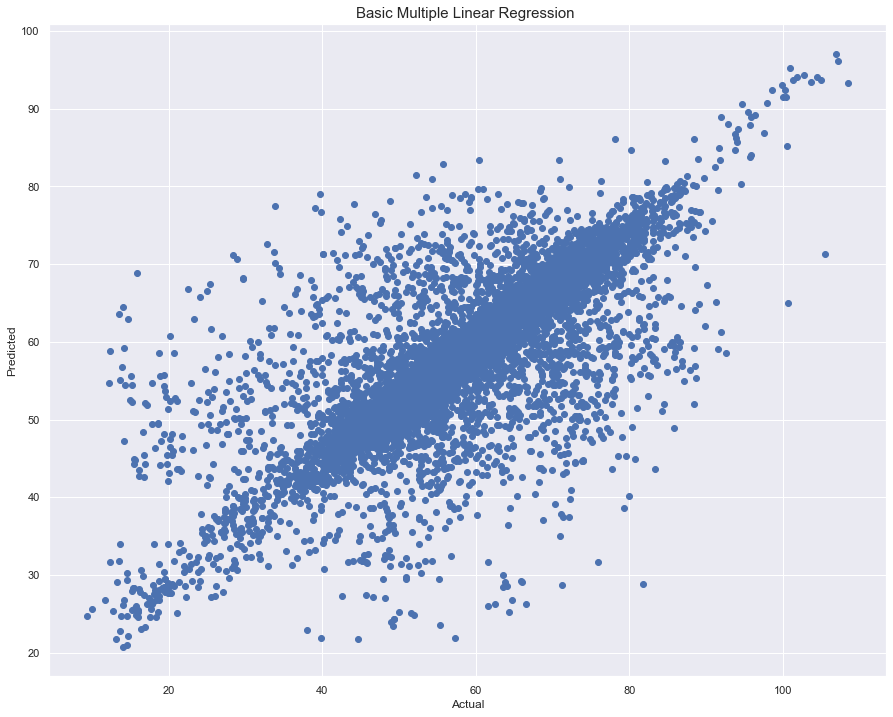

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Basic Multiple Linear Regression ',fontsize=15)

Text(0.5, 1.0, 'Basic Multiple Linear Regression with line')

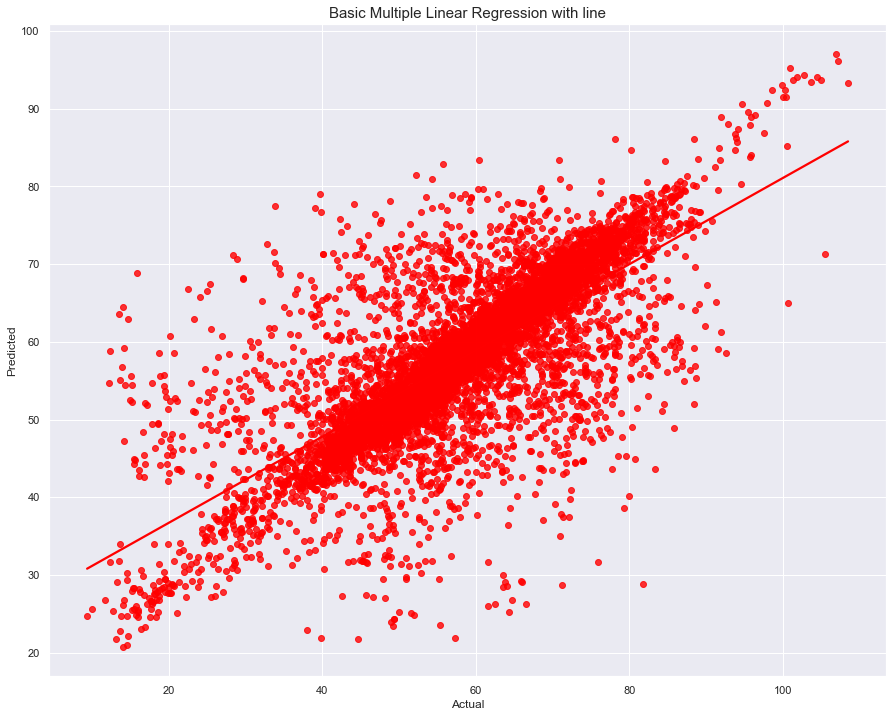

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Basic Multiple Linear Regression with line',fontsize=15)

In [ ]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df

,Actual Value,Predicted Value,Difference
0,65.66,57.682469,7.977531
1,81.89,75.630676,6.259324
2,49.84,50.672722,-0.832722
3,83.80,73.965841,9.834159
4,73.15,64.348872,8.801128
...,...,...,...
7008,64.38,65.691236,-1.311236
7009,68.80,49.348254,19.451746
7010,62.98,59.946373,3.033627
7011,41.12,47.155294,-6.035294


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
print("Mean Absolute Error of the MLR Model: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error of the MLR Model: ", mean_squared_error(y_test, y_pred))
print("R2 Score of the MLR Model: ", r2_score(y_test, y_pred)*100)
print('root_mean_squared_error of the  MLR Model: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error of the MLR Model:  6.305458321677274
Mean Squared Error of the MLR Model:  91.57090351374892
R2 Score of the MLR Model:  54.90627117706541
root_mean_squared_error of the  MLR Model:  9.569268703184633


### MLR Model Tuning

In [ ]:
#Tuned MLR model with diffrent parameters and showed the parameter that has the best result
from sklearn.model_selection import GridSearchCV
from numpy import arange

import warnings
warnings.filterwarnings('ignore')

model_lr = LinearRegression()

parameters = dict()
parameters['fit_intercept'] = [True,False]
parameters['normalize'] = [True,False]
parameters['copy_X'] = [True, False]
parameters['positive'] = [True, False]

grid_LR = GridSearchCV(estimator = model_lr, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 2)
grid_LR.fit(X_train, y_train)

print(grid_LR.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}


In [ ]:
#Train model with the suitable parameter
tuned_model = LinearRegression(normalize = True,
                      copy_X=True,
                      fit_intercept = True,
                      positive=True)
tuned_model.fit(X_train,y_train)

LinearRegression(normalize=True, positive=True)

In [ ]:
#Predict value
y_pred1 = tuned_model.predict(X_test)

### Tuned MLR Model Evaluation

In [ ]:
#Create dataframe to show the diffrent of actual and predicted result
pred_df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred1,'Difference':y_test-y_pred1})

In [ ]:
pred_df1

,Actual Value,Predicted Value,Difference
0,65.66,58.622304,7.037696
1,81.89,75.246292,6.643708
2,49.84,47.892570,1.947430
3,83.80,71.066436,12.733564
4,73.15,65.474452,7.675548
...,...,...,...
7008,64.38,65.772438,-1.392438
7009,68.80,50.069591,18.730409
7010,62.98,61.609816,1.370184
7011,41.12,48.089342,-6.969342


Text(0.5, 1.0, 'Tuned Multiple Linear Regression with line')

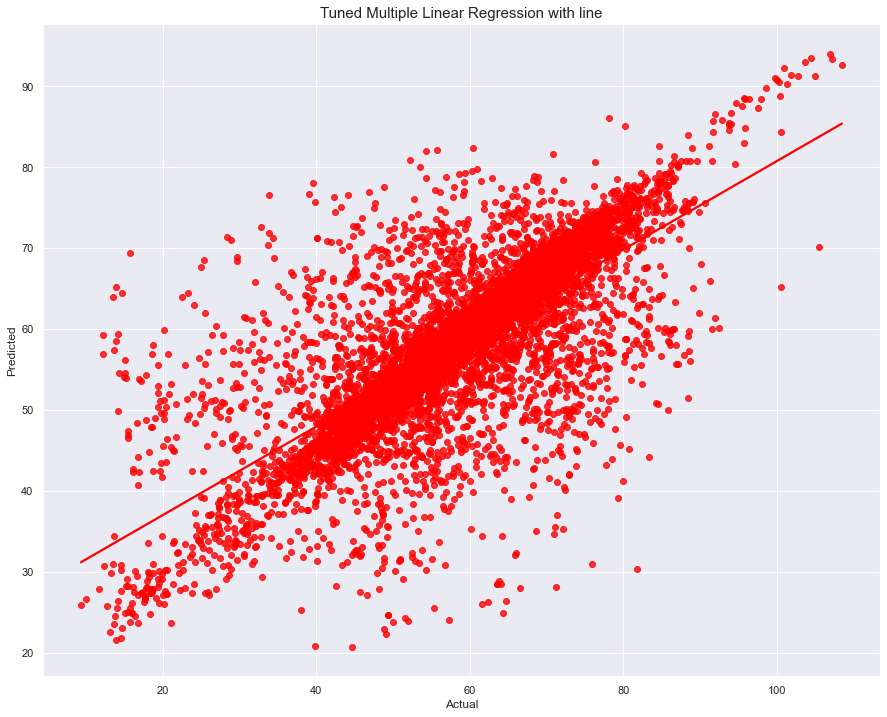

In [ ]:
sns.regplot(x=y_test,y=y_pred1,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Tuned Multiple Linear Regression with line',fontsize=15)

In [ ]:
print("Mean Absolute Error of the Tuned MLR Model: ", mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error of the Tuned MLR Model: ", mean_squared_error(y_test, y_pred1))
print("R2 Score of the Tuned MLR Model: ", r2_score(y_test, y_pred1))
print('root_mean_squared_error of the Tuned MLR Model:  ', np.sqrt(mean_squared_error(y_test, y_pred1)))

Mean Absolute Error of the Tuned MLR Model:  6.351074969589403
Mean Squared Error of the Tuned MLR Model:  93.0196974738268
R2 Score of the Tuned MLR Model:  0.5419281832851677
root_mean_squared_error of the Tuned MLR Model:   9.64467197336575


### Polynomial Regression Model Tuning

In [ ]:
#Using ramdom search to find the suitable degree for Polynomial Regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
param_grid = [
    {'poly__degree': [2,3,4,5,6]}
  ]

pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('model', LinearRegression())])

Random_search = RandomizedSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
Random_search.fit(X_train, y_train)

# Show Result from Randomized Search
print("Results from Randomized Search for Polynomial Regression Model" )
print("\n Best Estimator across ALL Searched Params:\n", Random_search.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", Random_search.best_params_)
print("\n Best Score across ALL Searched Params:\n", Random_search.best_score_)

Results from Randomized Search for Polynomial Regression Model

 Best Estimator across ALL Searched Params:
 Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

 Best Parameters across ALL Searched Params:
 {'poly__degree': 3}

 Best Score across ALL Searched Params:
 -81.31876789087076


In [ ]:
#creating Polynomial Regression with the suitable degree
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x)
X_train1, X_test1, y_train1, y_test1 = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [ ]:
y_predicted = poly_reg_model.predict(poly_features)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
poly_reg_y_predicted = poly_reg_model.predict(X_test1)

### Tuned Polynomial Regression Model Evaluation

In [ ]:
print("Mean Absolute Error of the Tuned PR Model: ", mean_absolute_error(y_test1, poly_reg_y_predicted))
print("Mean Squared Error of the Tuned PR Model: ", mean_squared_error(y_test1, poly_reg_y_predicted))
print("R2 Score of the Tuned PR Model: ", r2_score(y_test1, poly_reg_y_predicted))
print('root_mean_squared_error of the Tuned PR Model:  ', np.sqrt(mean_squared_error(y_test1, poly_reg_y_predicted)))

Mean Absolute Error of the Tuned PR Model:  6.162184247100824
Mean Squared Error of the Tuned PR Model:  83.8056147196597
R2 Score of the Tuned PR Model:  0.5873025689388054
root_mean_squared_error of the Tuned PR Model:   9.154540661314455


Text(0.5, 1.0, 'Tuned Polynomial Regression with line')

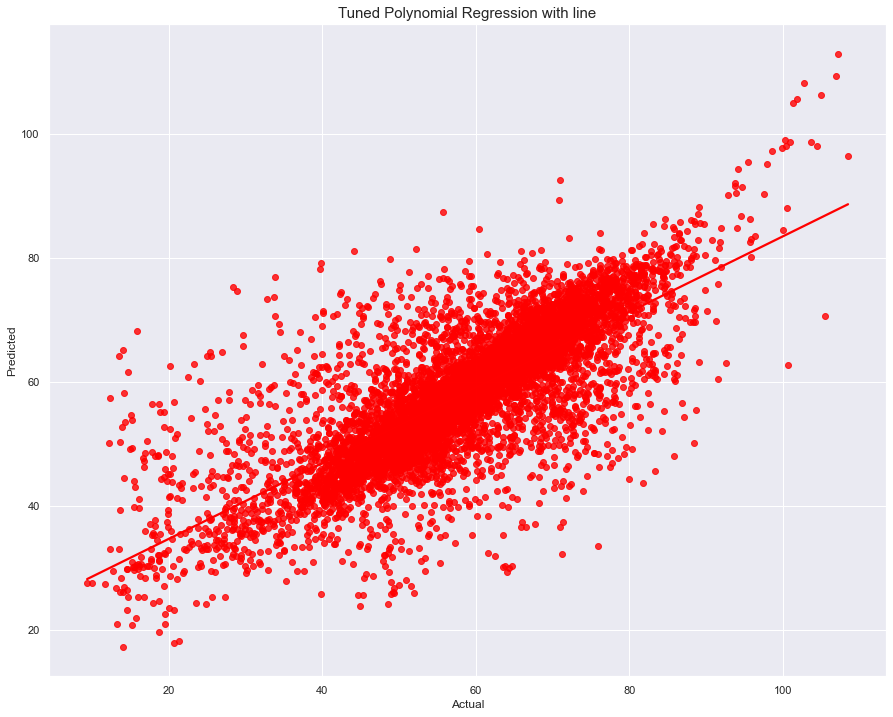

In [ ]:
sns.regplot(x=y_test1,y=poly_reg_y_predicted,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Tuned Polynomial Regression with line',fontsize=15)

### Final Model Evaluation

In [ ]:
# Calculate r2 score
lnreg_train = linreg.score(X_train, y_train)
lnreg_test = linreg.score(X_test, y_test)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Multiple Linear Regression'],
               'MSE in Train':[lnreg_train],
               'MSE in Test':[lnreg_test]}

# Calling DataFrame constructor
evaluation = pd.DataFrame(performance)
print('\033[1m'+"MODEL EVALUATION of Basic MLR Model"+'\033[0m\n')
print(evaluation)

MODEL EVALUATION of Basic MLR Model

                        Model  MSE in Train  MSE in Test
0  Multiple Linear Regression      0.555817     0.568428


In [ ]:
# Calculate r2 score
lnreg_train = tuned_model.score(X_train, y_train)
lnreg_test = tuned_model.score(X_test, y_test)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Multiple Linear Regression'],
               'MSE in Train':[lnreg_train],
               'MSE in Test':[lnreg_test]}

# Calling DataFrame constructor
evaluation = pd.DataFrame(performance)
print('\033[1m'+"MODEL EVALUATION of Tuned MLR Model"+'\033[0m\n')
print(evaluation)

MODEL EVALUATION of Tuned MLR Model

                        Model  MSE in Train  MSE in Test
0  Multiple Linear Regression      0.548279     0.558638


In [ ]:
# Calculate r2 score
PL_Train = poly_reg_model.score(X_train1, y_train1)
PL_Test = poly_reg_model.score(X_test1, y_test1)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Polynomial Regression'],
               'MSE in Train':[PL_Train],
               'MSE in Test':[PL_Test]}

# Calling DataFrame constructor
evaluation = pd.DataFrame(performance)
print('\033[1m'+"MODEL EVALUATION of Tuned PR Model"+'\033[0m\n')
print(evaluation)

MODEL EVALUATION of Tuned PR Model

                   Model  MSE in Train  MSE in Test
0  Polynomial Regression      0.609006     0.587303


In [ ]:
# Model result comparison
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
print("Mean Absolute Error of the MLR Model: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error of the MLR Model: ", mean_squared_error(y_test, y_pred))
print("R2 Score of the MLR Model: ", r2_score(y_test, y_pred))
print('root_mean_squared_error of the  MLR Model: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('')

print("Mean Absolute Error of the Tuned MLR Model: ", mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error of the Tuned MLR Model: ", mean_squared_error(y_test, y_pred1))
print("R2 Score of the Tuned MLR Model: ", r2_score(y_test, y_pred1))
print('root_mean_squared_error of the Tuned MLR Model:  ', np.sqrt(mean_squared_error(y_test, y_pred1)))
print('')

print("Mean Absolute Error of the Tuned PR Model: ", mean_absolute_error(y_test1, poly_reg_y_predicted))
print("Mean Squared Error of the Tuned PR Model: ", mean_squared_error(y_test1, poly_reg_y_predicted))
print("R2 Score of the Tuned PR Model: ", r2_score(y_test1, poly_reg_y_predicted))
print('root_mean_squared_error of the Tuned PR Model:  ', np.sqrt(mean_squared_error(y_test1, poly_reg_y_predicted)))

Mean Absolute Error of the MLR Model:  6.305458321677274
Mean Squared Error of the MLR Model:  91.57090351374892
R2 Score of the MLR Model:  0.5490627117706541
root_mean_squared_error of the  MLR Model:  9.569268703184633

Mean Absolute Error of the Tuned MLR Model:  6.351074969589403
Mean Squared Error of the Tuned MLR Model:  93.0196974738268
R2 Score of the Tuned MLR Model:  0.5419281832851677
root_mean_squared_error of the Tuned MLR Model:   9.64467197336575

Mean Absolute Error of the Tuned PR Model:  6.162184247100824
Mean Squared Error of the Tuned PR Model:  83.8056147196597
R2 Score of the Tuned PR Model:  0.5873025689388054
root_mean_squared_error of the Tuned PR Model:   9.154540661314455


## Deep Neural Network (DNN)

In [ ]:
#Import for DNN
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

### Basic Model Construction

Build Default Model

In [ ]:
print(x_train.shape)
print(x_test.shape)

(28051, 9)
(7013, 9)


In [ ]:
regressor = Sequential()

#IL
regressor.add(Dense(units = 350, activation = 'relu', input_dim = 9))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 250, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 250, activation = 'relu'))
regressor.add(Dropout(0.2))

#OL
regressor.add(Dense(units = 1, activation = 'linear'))
regressor.add(Dropout(0.2))

# compile
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               3500      
                                                                 
 dropout (Dropout)           (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               87750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [ ]:
history = regressor.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
877/877 [==============================] - 6s 6ms/step - loss: 853.2394 - mse: 853.2394 - val_loss: 203.6322 - val_mse: 203.6322
Epoch 2/100
877/877 [==============================] - 5s 6ms/step - loss: 814.0947 - mse: 814.0947 - val_loss: 207.6196 - val_mse: 207.6196
Epoch 3/100
877/877 [==============================] - 5s 6ms/step - loss: 798.9069 - mse: 798.9069 - val_loss: 217.3659 - val_mse: 217.3659
Epoch 4/100
877/877 [==============================] - 5s 5ms/step - loss: 793.8942 - mse: 793.8942 - val_loss: 294.7259 - val_mse: 294.7259
Epoch 5/100
877/877 [==============================] - 5s 5ms/step - loss: 785.7975 - mse: 785.7975 - val_loss: 248.9457 - val_mse: 248.9457
Epoch 6/100
877/877 [==============================] - 5s 6ms/step - loss: 794.5568 - mse: 794.5568 - val_loss: 227.3289 - val_mse: 227.3289
Epoch 7/100
877/877 [==============================] - 5s 6ms/step - loss: 779.7255 - mse: 779.7255 - val_loss: 298.8172 - val_mse: 298.8172
Epoch 8/100
8

### Basic Model Evaluation

In [ ]:
for item in history.history.values():
        item.remove(item[0])

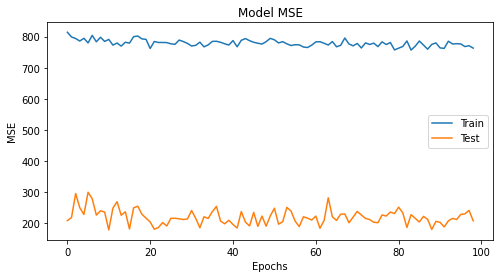

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc = 'upper_left')
plt.show()

Check Fitting

In [ ]:
dnn_train_pred = regressor.predict(x_train)
dnn_test_pred = regressor.predict(x_test)
dnn_train = mean_squared_error(y_train, dnn_train_pred)
dnn_test = mean_squared_error(y_test, dnn_test_pred)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Basic DNN'],
               'MSE in Train':[history.history['mse'][50]],
               'MSE in Test':[dnn_test]}

# Calling DataFrame constructor
overfitting = pd.DataFrame(performance)
print('\033[1m'+"Basic DNN MODEL for Overfitting Check"+'\033[0m\n')
print(overfitting)

Basic DNN MODEL for Overfitting Check

       Model  MSE in Train  MSE in Test
0  Basic DNN    789.721802   207.020405


Check score

In [ ]:
y_pred = regressor.predict(x_test)
print("Mean Absolute Error of the Basic DNN Model: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error of the Basic DNN Model: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error of the Basic DNN Model: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score of the Basic DNN Model: ", r2_score(y_test, y_pred)*100)

Mean Absolute Error of the Basic DNN Model:  12.646846722279605
Mean Squared Error of the Basic DNN Model:  207.02040496160566
Root Mean Squared Error of the Basic DNN Model:  14.388203673899174
R2 Score of the Basic DNN Model:  -1.946378641454527


### Model Tunning

Import required package for tunning

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner
from kerastuner import HyperModel
from tensorflow.keras import models, layers, regularizers
from keras_tuner import RandomSearch

     |████████████████████████████████| 135 kB 5.2 MB/s 


Check for best regulizer

In [ ]:
class RegulizerOptimize(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        #IL
        model.add(Dense(units = 350, activation = 'relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(hp.Float('reg_value', min_value=0.01, max_value=0.1, default=0.01, step=0.01))))
        model.add(Dropout(0.2))

        model.add(Dense(units = 250, activation = 'relu', kernel_regularizer=regularizers.l2(hp.Float('reg_value', min_value=0.01, max_value=0.1, default=0.01, step=0.01))))
        model.add(Dropout(0.2))

        model.add(Dense(units = 250, activation = 'relu', kernel_regularizer=regularizers.l2(hp.Float('reg_value', min_value=0.01, max_value=0.1, default=0.01, step=0.01))))
        model.add(Dropout(0.2))

        #OL
        model.add(Dense(units = 1, activation = 'linear'))
        model.add(Dropout(0.2))

        # compile
        model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

        return model

In [ ]:
input_shape = (x_train.shape[1],)
regulizerbest = RegulizerOptimize(input_shape)

In [ ]:
tuner_regulizer = RandomSearch(
            regulizerbest,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [ ]:
tuner_regulizer.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

In [ ]:
tuner_regulizer.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
reg_value: 0.06999999999999999
Score: 769.2055969238281


Choose best number of nueuron

In [ ]:
class UnitOptimizer(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        #IL
        model.add(Dense(units=hp.Int('units', 8, 64, 4, default=8), activation = 'relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        model.add(Dense(units=hp.Int('units', 8, 64, 4, default=8), activation = 'relu', kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        model.add(Dense(units=hp.Int('units', 8, 64, 4, default=8), activation = 'relu', kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        #OL
        model.add(Dense(units = 1, activation = 'linear'))
        model.add(Dropout(0.2))

        # compile
        model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

        return model

In [ ]:
input_shape = (x_train.shape[1],)
unitbest = UnitOptimizer(input_shape)

In [ ]:
tuner_unit = RandomSearch(
            unitbest,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [ ]:
tuner_unit.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_unit.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
units: 64
Score: 797.9891357421875


Choose best activation

In [ ]:
class ActivationOptimizer(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        #IL
        model.add(Dense(units = 350, activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu'), input_shape=input_shape, kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        model.add(Dense(units = 350, activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu'), kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        model.add(Dense(units = 350, activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu'), kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        #OL
        model.add(Dense(units = 1, activation = 'linear'))
        model.add(Dropout(0.2))

        # compile
        model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

        return model

In [ ]:
input_shape = (x_train.shape[1],)
activationbest = ActivationOptimizer(input_shape)

In [ ]:
tuner_activation = RandomSearch(
            activationbest,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [ ]:
tuner_activation.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_activation.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
dense_activation: relu
Score: 773.35693359375


Choose best dropout

In [ ]:
class DropoutOptimize(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        #IL
        model.add(Dense(units = 350, activation = 'relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.07)))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        model.add(Dense(units = 250, activation = 'relu', kernel_regularizer=regularizers.l2(0.07)))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        model.add(Dense(units = 250, activation = 'relu', kernel_regularizer=regularizers.l2(0.07)))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        #OL
        model.add(Dense(units = 1, activation = 'linear'))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        # compile
        model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

        return model

In [ ]:
input_shape = (x_train.shape[1],)
dropoutbest = DropoutOptimize(input_shape)

In [ ]:
tuner_dropout = RandomSearch(
            dropoutbest,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [ ]:
tuner_dropout.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_dropout.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
dropout: 0.2
Score: 777.0233154296875


Choose best optimizer

In [ ]:
class OptimizerOptimize(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        #IL
        model.add(Dense(units = 350, activation = 'relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        model.add(Dense(units = 250, activation = 'relu', kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        model.add(Dense(units = 250, activation = 'relu', kernel_regularizer=regularizers.l2(0.07)))
        model.add(Dropout(0.2))

        #OL
        model.add(Dense(units = 1, activation = 'linear'))
        model.add(Dropout(0.2))

        # compile
        hp_optimizer = hp.Choice('Optimizer', ['sgd', 'adam', 'rmsprop'])
        model.compile(
            optimizer=hp_optimizer ,loss='mean_squared_error',metrics=['mse']
        )

        return model

In [ ]:
input_shape = (x_train.shape[1],)
optimizerbest = OptimizerOptimize(input_shape)

In [ ]:
tuner_optimizer = RandomSearch(
            optimizerbest,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [ ]:
tuner_optimizer.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_optimizer.results_summary(num_trials=10)

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
Optimizer: rmsprop
Score: 779.9896850585938
Trial summary
Hyperparameters:
Optimizer: sgd
Score: nan
Trial summary
Hyperparameters:
Optimizer: adam
Score: 778.0085754394531


### Final Model Construction

Best combination

In [ ]:
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(layers.Dense(units=hp.Int('units', 8, 64, 4, default=8), activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu'), input_shape=input_shape, kernel_regularizer=regularizers.l2(0.07)))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        model.add(layers.Dense(units=hp.Int('units', 16, 64, 4, default=16), kernel_regularizer=regularizers.l2(0.07), activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu')))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        model.add(layers.Dense(units=hp.Int('units', 16, 64, 4, default=16), kernel_regularizer=regularizers.l2(0.07), activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu')))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.8, default=0.2, step=0.1)))

        model.add(layers.Dense(1, activation = 'linear'))

        hp_optimizer = hp.Choice('Optimizer', ['sgd', 'adam', 'rmsprop'])
        model.compile(optimizer=hp_optimizer ,loss='mean_squared_error',metrics=['mse'])

        return model

In [ ]:
input_shape = (x_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [ ]:
tuner_rs = RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [ ]:
tuner_rs.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_rs.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
units: 60
dense_activation: tanh
dropout: 0.2
Optimizer: adam
Score: 108.65339279174805


Best model construct

In [ ]:
best_dnn = tuner_rs.get_best_hyperparameters(num_trials = 1)[0]

In [ ]:
tuned_dnn_model = tuner_rs.hypermodel.build(best_dnn)

In [ ]:
tuned_hist = tuned_dnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
877/877 [==============================] - 3s 3ms/step - loss: 1053.5052 - mse: 1043.1227 - val_loss: 301.8431 - val_mse: 293.1023
Epoch 2/100
877/877 [==============================] - 2s 3ms/step - loss: 222.0128 - mse: 215.3022 - val_loss: 156.8520 - val_mse: 151.4783
Epoch 3/100
877/877 [==============================] - 2s 3ms/step - loss: 146.5336 - mse: 140.8377 - val_loss: 113.4936 - val_mse: 107.3486
Epoch 4/100
877/877 [==============================] - 2s 3ms/step - loss: 121.4811 - mse: 115.5773 - val_loss: 101.9961 - val_mse: 96.5252
Epoch 5/100
877/877 [==============================] - 2s 3ms/step - loss: 117.1501 - mse: 111.9431 - val_loss: 100.4033 - val_mse: 95.6000
Epoch 6/100
877/877 [==============================] - 2s 3ms/step - loss: 114.4819 - mse: 109.8869 - val_loss: 99.3208 - val_mse: 94.9441
Epoch 7/100
877/877 [==============================] - 2s 3ms/step - loss: 114.3128 - mse: 110.1518 - val_loss: 97.6962 - val_mse: 93.7322
Epoch 8/100
877/8

### Final Model Evaluation

In [ ]:
for item in tuned_hist.history.values():
        item.remove(item[0])

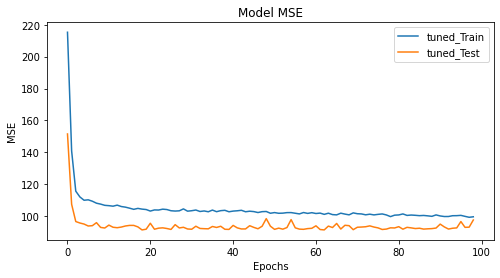

In [ ]:
plt.plot(tuned_hist.history['mse'])
plt.plot(tuned_hist.history['val_mse'])
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['tuned_Train', 'tuned_Test'], loc = 'upper_left')
plt.show()

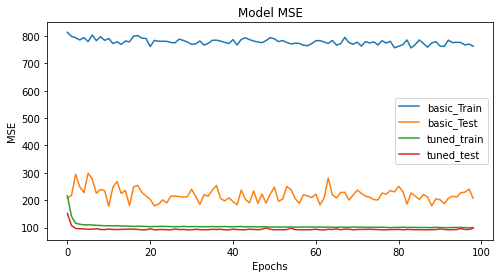

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.plot(tuned_hist.history['mse'])
plt.plot(tuned_hist.history['val_mse'])
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['basic_Train', 'basic_Test', 'tuned_train', 'tuned_test'], loc = 'upper_left')
plt.show()

Compare Fitting

In [ ]:
# Calculate MSE of All DNN Models
dnn_final_train_pred = tuned_dnn_model.predict(x_train)
dnn_final_test_pred = tuned_dnn_model.predict(x_test)
dnn_final_train = mean_squared_error(y_train, dnn_final_train_pred)
dnn_final_test = mean_squared_error(y_test, dnn_final_test_pred)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Basic DNN', 'Final DNN w/ HyperParamsTuning'],
               'MSE in Train':[history.history['mse'][50], tuned_hist.history['mse'][50]],
               'MSE in Test':[dnn_test, dnn_final_test]}

# Calling DataFrame constructor
overfitting = pd.DataFrame(performance)
print('\033[1m'+"DNN MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(overfitting)

DNN MODEL COMPARISON for Overfitting Check

                            Model  MSE in Train  MSE in Test
0                       Basic DNN    789.721802   207.020405
1  Final DNN w/ HyperParamsTuning    102.147720    97.486925


Check Score

In [ ]:
tuned_y_pred = tuned_dnn_model.predict(x_test)
print("Mean Absolute Error of the Final DNN Model: ", mean_absolute_error(y_test, tuned_y_pred))
print("Mean Squared Error of the Final DNN Model: ", mean_squared_error(y_test, tuned_y_pred))
print("Root Mean Squared Error of the Final DNN Model: ", math.sqrt(mean_squared_error(y_test, tuned_y_pred)))
print("R2 Score of the Final DNN Model: ", r2_score(y_test, tuned_y_pred)*100)

Mean Absolute Error of the Final DNN Model:  6.88538394128921
Mean Squared Error of the Final DNN Model:  97.48692475481242
Root Mean Squared Error of the Final DNN Model:  9.87354671609004
R2 Score of the Final DNN Model:  51.99294994380727


## Recurrent Neural Network (RNN) - LSTM

### Basic Model Construction

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

#### Preset Before Modelling - Data Split, Array Creation and Variable Assignment

In [ ]:
df = data.copy()

In [ ]:
# Split Dataset to 80% Train and 20% Test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
# Display Dimension
train.shape, test.shape

((28051, 10), (7013, 10))

In [ ]:
# Create Array for Both Train and Test Data for Later Plotting
train_set = train.iloc[:, 9].values
test_set = test.iloc[:, 9].values

In [ ]:
# Display Dimension
train_set.shape, test_set.shape

((28051,), (7013,))

In [ ]:
# Create Array for Both Train and Test Data for Later Modelling
train_data = train['price actual'].values
test_data = test['price actual'].values

#### Part 1 - Data Preprocessing

##### Feature Scaling / Data Normalisation

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
train_data = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
print(train_data.shape)
test_data = scaler.fit_transform(np.array(test_data).reshape(-1, 1))
print(test_data.shape)

(28051, 1)
(7013, 1)


##### Train - Data Structure and Reshaping

In [ ]:
train_data.shape

(28051, 1)

In [ ]:
# Creating a Data Structure with 24 Timestamps (A Whole Day from 00.00 to 23:00) and 1 Output
X_train = []
y_train = []

for i in range(24, 28051):    # Data Shape of train_data shows 28051 records
    X_train.append(train_data[i-24:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train)
X_train.shape

[[0.52182004 0.51726063 0.51316647 ... 0.60100493 0.56946124 0.50990974]
 [0.51726063 0.51316647 0.46515307 ... 0.56946124 0.50990974 0.5088862 ]
 [0.51316647 0.46515307 0.43463292 ... 0.50990974 0.5088862  0.45715083]
 ...
 [0.43025961 0.45789523 0.52842654 ... 0.3712664  0.33879222 0.29012748]
 [0.45789523 0.52842654 0.64678515 ... 0.33879222 0.29012748 0.23662417]
 [0.52842654 0.64678515 0.64176049 ... 0.29012748 0.23662417 0.21857262]]


(28027, 24)

In [ ]:
print(y_train)
y_train.shape

[0.5088862  0.45715083 0.42216432 ... 0.23662417 0.21857262 0.18693589]


(28027,)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [ ]:
print(X_train)

[[[0.52182004 0.51726063 0.51316647 ... 0.60100493 0.56946124 0.50990974]]

 [[0.51726063 0.51316647 0.46515307 ... 0.56946124 0.50990974 0.5088862 ]]

 [[0.51316647 0.46515307 0.43463292 ... 0.50990974 0.5088862  0.45715083]]

 ...

 [[0.43025961 0.45789523 0.52842654 ... 0.3712664  0.33879222 0.29012748]]

 [[0.45789523 0.52842654 0.64678515 ... 0.33879222 0.29012748 0.23662417]]

 [[0.52842654 0.64678515 0.64176049 ... 0.29012748 0.23662417 0.21857262]]]


##### Test - Data Structure and Reshaping

In [ ]:
test_data.shape  # only 16 records before reshaping

(7013, 1)

In [ ]:
# Creating a Data Structure with 24 Timestamps (A Whole Day from 00.00 to 23:00) and 1 Output
X_test = []
y_test = []

for i in range(24, 7013):    # Data Shape of data shows 7013 records
    X_test.append(test_data[i-24:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print(X_test)
X_test.shape

[[0.49575489 0.60378984 0.49501661 ... 0.38304417 0.4314015  0.57438169]
 [0.60378984 0.49501661 0.43410853 ... 0.4314015  0.57438169 0.68463148]
 [0.49501661 0.43410853 0.24523194 ... 0.57438169 0.68463148 0.66691276]
 ...
 [0.77494771 0.75378368 0.72388335 ... 0.82379722 0.81653747 0.80595546]
 [0.75378368 0.72388335 0.71047127 ... 0.81653747 0.80595546 0.78306878]
 [0.72388335 0.71047127 0.61104959 ... 0.80595546 0.78306878 0.72880522]]


(6989, 24)

In [ ]:
print(y_test)
y_test.shape

[0.68463148 0.66691276 0.57511997 ... 0.78306878 0.72880522 0.72868217]


(6989,)

In [ ]:
# reshape input to be [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
print(X_test)

[[[0.49575489 0.60378984 0.49501661 ... 0.38304417 0.4314015  0.57438169]]

 [[0.60378984 0.49501661 0.43410853 ... 0.4314015  0.57438169 0.68463148]]

 [[0.49501661 0.43410853 0.24523194 ... 0.57438169 0.68463148 0.66691276]]

 ...

 [[0.77494771 0.75378368 0.72388335 ... 0.82379722 0.81653747 0.80595546]]

 [[0.75378368 0.72388335 0.71047127 ... 0.81653747 0.80595546 0.78306878]]

 [[0.72388335 0.71047127 0.61104959 ... 0.80595546 0.78306878 0.72880522]]]


#### Part 2 - Building RNN

In [ ]:
# Initialising the RNN
lstm = Sequential()

# Adding Input Layer (IL) and 1st LSTM Layer and some Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_test.shape[1], 24)))
lstm.add(Dropout(0.2))  # can vary from 0.2 to 0.5 for model tuning

# Adding 2nd LSTM Layer and some Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

# Adding 3rd LSTM Layer and some Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = False))
lstm.add(Dropout(0.2))

# Adding Output Layer (OL)
lstm.add(Dense(units = 1))   # unit = 1 (1 TV)

lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 50)             15000     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_11 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_5 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
# Compiling the RNN
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

# Fitting the RNN to the Training set
history_lstm = lstm.fit(X_train, y_train, epochs = 100, batch_size = 32,
                        validation_data = (X_test, y_test), verbose = 1, shuffle = False)
# epochs = no. of iteration
# batch_size = no. of datapoints that are going to pass through the model one time

Epoch 1/100
876/876 [==============================] - 14s 9ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 2/100
876/876 [==============================] - 6s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 3/100
876/876 [==============================] - 7s 8ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 4/100
876/876 [==============================] - 6s 7ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 5/100
876/876 [==============================] - 6s 7ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 6/100
876/876 [==============================] - 6s 7ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 7/100
876/876 [==============================] - 6s 7ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 8/100
876/876 [==============================] - 7s 8ms/step -

#### Part 3 - Making Predictions and Visualising Results using Test Dataset

In [ ]:
real_electricity_price = test_set
print(real_electricity_price)

[50.95 59.73 50.89 ... 74.3  69.89 69.88]


In [ ]:
train_predict = lstm.predict(X_train)
test_predict = lstm.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([y_test])

In [ ]:
predicted_electricity_price = test_predict
print(predicted_electricity_price)

[[61.23975 ]
 [61.416595]
 [57.026176]
 ...
 [69.3124  ]
 [66.878395]
 [62.412518]]


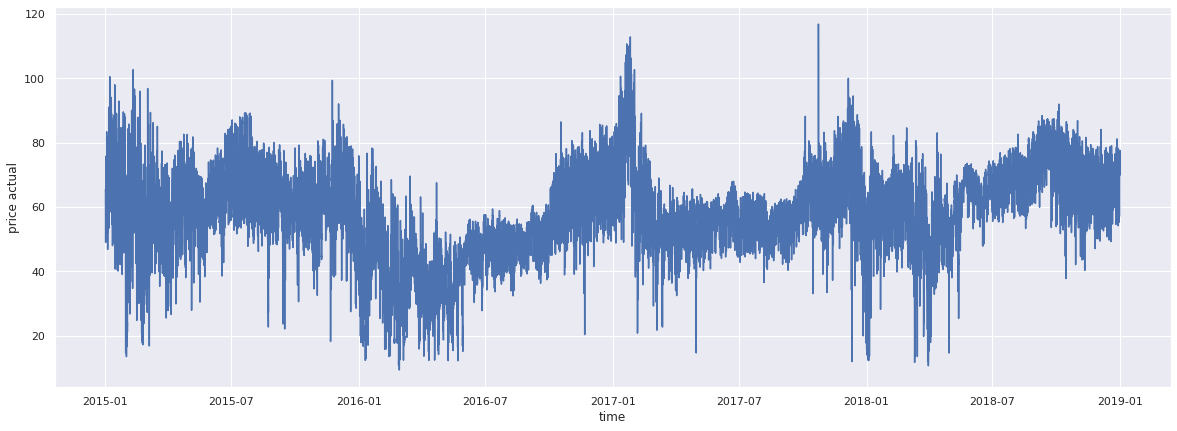

In [ ]:
# Plot between time and price actual
import seaborn as sns
plt.figure(figsize = (20,7))
sns.lineplot(x = "time", y = "price actual", data = data)
plt.show()

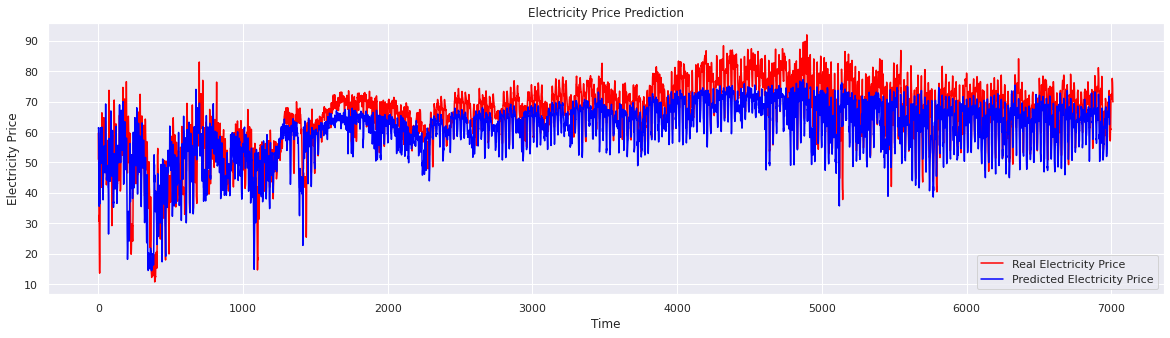

In [ ]:
# Visualising Results
plt.figure(figsize = (20,5))
plt.plot(real_electricity_price, color = 'red', label = 'Real Electricity Price')
plt.plot(predicted_electricity_price, color = 'blue', label = 'Predicted Electricity Price')
plt.title('Electricity Price Prediction')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()
plt.show()

### Basic Model Evaluation

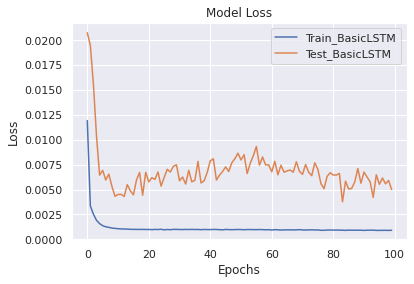

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(history_lstm.history['loss'], label = 'Train_BasicLSTM')
plt.plot(history_lstm.history['val_loss'], label = 'Test_BasicLSTM')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
plt.show();

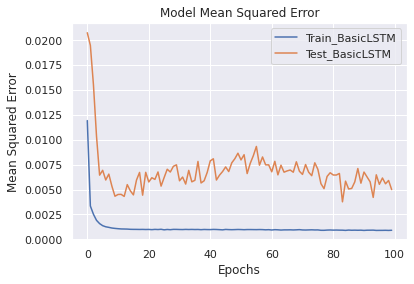

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(history_lstm.history['mse'], label = 'Train_BasicLSTM')
plt.plot(history_lstm.history['val_mse'], label = 'Test_BasicLSTM')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend(loc = 'upper_left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
print('Train Mean Absolute Error of LSTM Model:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Mean Squared Error of LSTM Model:', mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error of LSTM Model:', np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Train R2 Score of LSTM Model:', r2_score(Y_train[0], train_predict[:,0]))

print('Test Mean Absolute Error of LSTM Model:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Mean Squared Error of LSTM Model:', mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error of LSTM Model:', np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print('Test R2 Score of LSTM Model:', r2_score(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error of LSTM Model: 2.4048159504816797
Train Mean Squared Error of LSTM Model: 8.646279828724905
Train Root Mean Squared Error of LSTM Model: 2.9404557178649884
Train R2 Score of LSTM Model: 0.9254518301958249
Test Mean Absolute Error of LSTM Model: 5.1180310743645485
Test Mean Squared Error of LSTM Model: 33.014559549966044
Test Root Mean Squared Error of LSTM Model: 5.745829752957013
Test R2 Score of LSTM Model: 0.7496642096658821


In [ ]:
# Calculate MSE of LSTM Models
mse_train = mean_squared_error(Y_train[0], train_predict[:,0])
mse_test = mean_squared_error(Y_test[0], test_predict[:,0])
rmse_train =np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
rmse_test = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
r2_train = (r2_score(Y_train[0], train_predict[:,0]))*100
r2_test = (r2_score(Y_test[0], test_predict[:,0]))*100

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Dataset':['Train', 'Test'],
               'MSE':[mse_train, mse_test],
               'RMSE':[rmse_train, rmse_test],
               'R2':[r2_train, r2_test]}

# Calling DataFrame constructor
evaluation = pd.DataFrame(performance)
print('\033[1m'+"MODEL EVALUATION of Basic LSTM Model"+'\033[0m\n')
print(evaluation)

MODEL EVALUATION of Basic LSTM Model

  Dataset       MSE      RMSE         R2
0   Train   8.64628  2.940456  92.545183
1    Test  33.01456  5.745830  74.966421


### Model Tuning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.1 MB/s 


In [ ]:
import keras_tuner as kt

In [ ]:
from keras.models import save_model
from keras.models import model_from_json
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from keras import regularizers
import warnings
warnings.simplefilter("ignore", UserWarning)

### Model Tuning Trial 1 Before Manual Hyperparameter Tuning

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit', min_value = 32, max_value = 512, step = 32),
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 24)))
    # Dropout Value
    model.add(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)))

    # No. of Layers
    for i in range(hp.Int('n_layers', 1, 3)):

      # No. of Neurons in Each Layer
      model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value = 32, max_value = 512, step = 32),
                     return_sequences = True,
                     activation = 'relu'))
      # Dropout Value
      model.add(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)))

    model.add(LSTM(hp.Int('layer_2_neurons', min_value = 32, max_value = 512, step = 32),
                   activation = 'relu'))
    # Dropout Value
    model.add(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)))

    # OL: Dense Layer and Activation Function
    model.add(Dense(1, activation = hp.Choice('dense_activation', values = ['relu', 'linear'], default = 'relu')))

    # Compile
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

    return model

In [ ]:
tuner = RandomSearch(
        build_model,
        objective = 'mse',
        max_trials = 3,
        executions_per_trial = 1)

In [ ]:
tuner.search(
        x = X_train,
        y = y_train,
        epochs = 20,
        batch_size = 32,
        validation_data = (X_test, y_test),
)

Trial 3 Complete [00h 11m 28s]
mse: 0.0007724356837570667

Best mse So Far: 0.0007724356837570667
Total elapsed time: 00h 33m 16s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(num_trials = 3)

Results summary
Results in ./untitled_project
Showing 3 best trials
Trial summary
Hyperparameters:
input_unit: 512
Dropout_rate: 0.1
n_layers: 2
lstm_0_units: 128
layer_2_neurons: 416
dense_activation: linear
lstm_1_units: 32
Score: 0.0007724356837570667
Trial summary
Hyperparameters:
input_unit: 448
Dropout_rate: 0.30000000000000004
n_layers: 1
lstm_0_units: 416
layer_2_neurons: 384
dense_activation: relu
Score: 0.0008550481870770454
Trial summary
Hyperparameters:
input_unit: 128
Dropout_rate: 0.5
n_layers: 1
lstm_0_units: 320
layer_2_neurons: 128
dense_activation: relu
Score: 0.0012949672527611256


### Model Tuning Trial 2 After Manual Hyperparameter Tuning

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit', min_value = 64, max_value = 160, step = 32),
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 24)))
    # Dropout Value
    model.add(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.4, step = 0.1)))

    # No. of Layers
    for i in range(hp.Int('n_layers', 1, 3)):

      # No. of Neurons in Each Layer
      model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value = 32, max_value = 128, step = 32),
                     return_sequences = True,
                     activation = 'relu'))
      # Dropout Value
      model.add(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.4, step = 0.1)))

    model.add(LSTM(hp.Int('layer_2_neurons', min_value = 32, max_value = 96, step = 32),
                   activation = 'relu'))
    # Dropout Value
    model.add(Dropout(hp.Float('Dropout_rate', min_value = 0, max_value = 0.4, step = 0.1)))

    # OL: Dense Layer and Activation Function
    model.add(Dense(1, activation = hp.Choice('dense_activation', values = ['relu', 'linear'], default = 'relu')))

    # Compile
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

    return model

In [ ]:
tuner = RandomSearch(
        build_model,
        objective = 'mse',
        max_trials = 3,
        executions_per_trial = 1)

In [ ]:
tuner.search(
        x = X_train,
        y = y_train,
        epochs = 20,
        batch_size = 32,
        validation_data = (X_test, y_test),
)

Trial 3 Complete [00h 02m 57s]
mse: 0.0014456799253821373

Best mse So Far: 0.001091817975975573
Total elapsed time: 00h 08m 42s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(num_trials = 3)

Results summary
Results in ./untitled_project
Showing 3 best trials
Trial summary
Hyperparameters:
input_unit: 160
Dropout_rate: 0.30000000000000004
n_layers: 1
lstm_0_units: 128
layer_2_neurons: 64
dense_activation: relu
Score: 0.001091817975975573
Trial summary
Hyperparameters:
input_unit: 128
Dropout_rate: 0.30000000000000004
n_layers: 1
lstm_0_units: 32
layer_2_neurons: 64
dense_activation: relu
Score: 0.0011946731247007847
Trial summary
Hyperparameters:
input_unit: 160
Dropout_rate: 0.30000000000000004
n_layers: 2
lstm_0_units: 32
layer_2_neurons: 64
dense_activation: linear
lstm_1_units: 32
Score: 0.0014456799253821373


In [ ]:
best_lstm = tuner.get_best_hyperparameters(num_trials = 3)[0]
final_lstm = tuner.hypermodel.build(best_lstm)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

file = 'Best LSTM Model.hdf5'

keras_callbacks = [
    EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1),
    ModelCheckpoint(file, monitor = 'val_loss', save_best_only = True, mode = 'min')
]

history_final_lstm = final_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32,
                                    validation_data = (X_test, y_test),
                                    verbose = 2, callbacks = keras_callbacks, shuffle = False)

Epoch 1/100
876/876 - 13s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0287 - val_mse: 0.0287 - 13s/epoch - 15ms/step
Epoch 2/100
876/876 - 7s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0221 - val_mse: 0.0221 - 7s/epoch - 8ms/step
Epoch 3/100
876/876 - 7s - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0247 - val_mse: 0.0247 - 7s/epoch - 8ms/step
Epoch 4/100
876/876 - 7s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0115 - val_mse: 0.0115 - 7s/epoch - 8ms/step
Epoch 5/100
876/876 - 7s - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0072 - val_mse: 0.0072 - 7s/epoch - 9ms/step
Epoch 6/100
876/876 - 7s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0059 - val_mse: 0.0059 - 7s/epoch - 8ms/step
Epoch 7/100
876/876 - 7s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0055 - val_mse: 0.0055 - 7s/epoch - 9ms/step
Epoch 8/100
876/876 - 7s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0067 - val_mse: 0.0067 - 7s/epoch - 8ms/step
Epoch 9/100
876/876 - 7s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0044 - val_mse: 0.0044 - 

In [ ]:
best_lstm = tuner.get_best_hyperparameters(num_trials = 3)[1]
final_lstm = tuner.hypermodel.build(best_lstm)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

file = 'Best LSTM Model.hdf5'

keras_callbacks = [
    EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1),
    ModelCheckpoint(file, monitor = 'val_loss', save_best_only = True, mode = 'min')
]

history_final_lstm = final_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32,
                                    validation_data = (X_test, y_test),
                                    verbose = 2, callbacks = keras_callbacks, shuffle = False)

Epoch 1/100
876/876 - 11s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0331 - val_mse: 0.0331 - 11s/epoch - 12ms/step
Epoch 2/100
876/876 - 5s - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0250 - val_mse: 0.0250 - 5s/epoch - 6ms/step
Epoch 3/100
876/876 - 5s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0227 - val_mse: 0.0227 - 5s/epoch - 6ms/step
Epoch 4/100
876/876 - 5s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0236 - val_mse: 0.0236 - 5s/epoch - 6ms/step
Epoch 5/100
876/876 - 5s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0121 - val_mse: 0.0121 - 5s/epoch - 6ms/step
Epoch 6/100
876/876 - 5s - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0102 - val_mse: 0.0102 - 5s/epoch - 6ms/step
Epoch 7/100
876/876 - 5s - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0080 - val_mse: 0.0080 - 5s/epoch - 6ms/step
Epoch 8/100
876/876 - 5s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0067 - val_mse: 0.0067 - 5s/epoch - 6ms/step
Epoch 9/100
876/876 - 5s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0060 - val_mse: 0.0060 - 

In [ ]:
best_lstm = tuner.get_best_hyperparameters(num_trials = 3)[2]
final_lstm = tuner.hypermodel.build(best_lstm)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

file = 'Best LSTM Model.hdf5'

keras_callbacks = [
    EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1),
    ModelCheckpoint(file, monitor = 'val_loss', save_best_only = True, mode = 'min')
]

history_final_lstm = final_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32,
                                    validation_data = (X_test, y_test),
                                    verbose = 2, callbacks = keras_callbacks, shuffle = False)

Epoch 1/100
876/876 - 15s - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0416 - val_mse: 0.0416 - 15s/epoch - 17ms/step
Epoch 2/100
876/876 - 7s - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0285 - val_mse: 0.0285 - 7s/epoch - 8ms/step
Epoch 3/100
876/876 - 7s - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0266 - val_mse: 0.0266 - 7s/epoch - 8ms/step
Epoch 4/100
876/876 - 7s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0249 - val_mse: 0.0249 - 7s/epoch - 8ms/step
Epoch 5/100
876/876 - 7s - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0283 - val_mse: 0.0283 - 7s/epoch - 8ms/step
Epoch 6/100
876/876 - 7s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0237 - val_mse: 0.0237 - 7s/epoch - 8ms/step
Epoch 7/100
876/876 - 7s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0183 - val_mse: 0.0183 - 7s/epoch - 8ms/step
Epoch 8/100
876/876 - 7s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0151 - val_mse: 0.0151 - 7s/epoch - 8ms/step
Epoch 9/100
876/876 - 7s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0170 - val_mse: 0.0170 - 

### Final Model Construction

In [ ]:
# Initialising the RNN
final_lstm = Sequential()

# Adding Input Layer (IL) and 1st LSTM Layer
final_lstm.add(LSTM(units = 160, return_sequences = True, input_shape = (X_test.shape[1], 24)))

# Adding 2nd LSTM Layer
final_lstm.add(LSTM(units = 128, return_sequences = True))

# Adding 3rd LSTM Layer
final_lstm.add(LSTM(units = 96, return_sequences = False))

# Adding Output Layer (OL)
final_lstm.add(Dense(units = 1, activation = 'linear'))   # unit = 1 (1 TV)

# Compiling the RNN
opt = Adam(lr = 1e-5)
final_lstm.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mse'])

In [ ]:
history_final_lstm = final_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), verbose = 1, shuffle = False)

Epoch 1/100
876/876 [==============================] - 18s 15ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.0811 - val_mse: 0.0811
Epoch 2/100
876/876 [==============================] - 9s 11ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3/100
876/876 [==============================] - 9s 11ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4/100
876/876 [==============================] - 9s 11ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 5/100
876/876 [==============================] - 9s 11ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 6/100
876/876 [==============================] - 9s 11ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 7/100
876/876 [==============================] - 9s 11ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 8/100
876/876 [==============================] - 9s 11m

In [ ]:
real_electricity_price = test_set
print(real_electricity_price)

[50.95 59.73 50.89 ... 74.3  69.89 69.88]


In [ ]:
train_predict = final_lstm.predict(X_train)
test_predict = final_lstm.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([y_test])

In [ ]:
predicted_electricity_price = test_predict
print(predicted_electricity_price)

[[60.788174]
 [66.61271 ]
 [62.072807]
 ...
 [73.58901 ]
 [70.49089 ]
 [64.32584 ]]


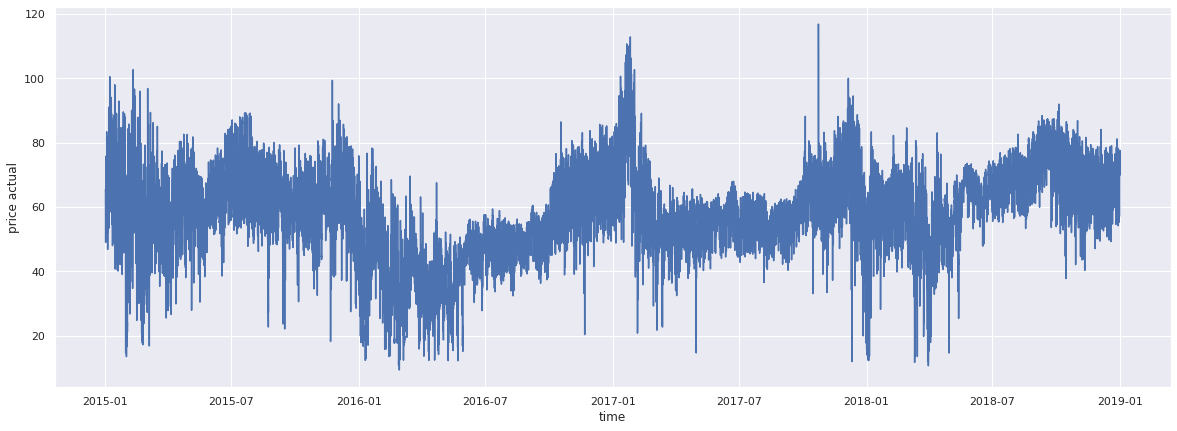

In [ ]:
# Plot between time and price actual
import seaborn as sns
plt.figure(figsize = (20,7))
sns.lineplot(x = "time", y = "price actual", data = data)
plt.show()

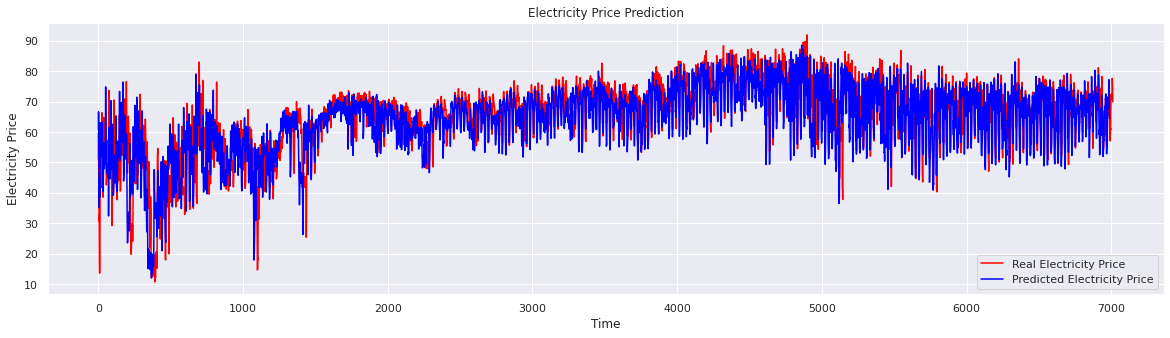

In [ ]:
# Visualising Results
plt.figure(figsize = (20,5))
plt.plot(real_electricity_price, color = 'red', label = 'Real Electricity Price')
plt.plot(predicted_electricity_price, color = 'blue', label = 'Predicted Electricity Price')
plt.title('Electricity Price Prediction')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()
plt.show()

### Final Model Evaluation

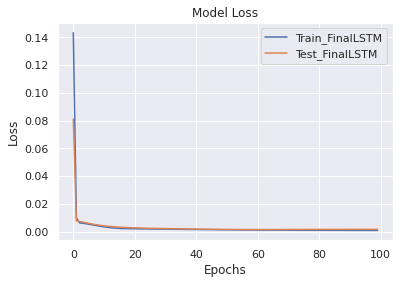

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(history_final_lstm.history['loss'], label = 'Train_FinalLSTM')
plt.plot(history_final_lstm.history['val_loss'], label = 'Test_FinalLSTM')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
plt.show();

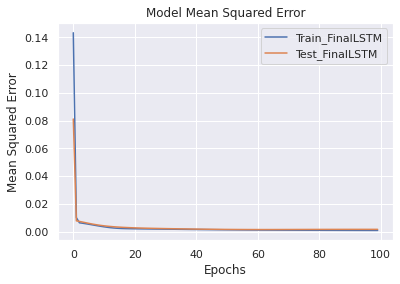

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(history_final_lstm.history['mse'], label = 'Train_FinalLSTM')
plt.plot(history_final_lstm.history['val_mse'], label = 'Test_FinalLSTM')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend(loc = 'upper_left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
print('Train Mean Absolute Error of Final LSTM Model:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Mean Squared Error of Final LSTM Model:', mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error of Final LSTM Model:', np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Train R2 Score of LSTM Final Model:', r2_score(Y_train[0], train_predict[:,0]))

print('Test Mean Absolute Error of Final LSTM Model:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Mean Squared Error of Final LSTM Model:', mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error of Final LSTM Model:', np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print('Test R2 Score of Final LSTM Model:', r2_score(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error of Final LSTM Model: 1.6286334317933329
Train Mean Squared Error of Final LSTM Model: 5.130712904391411
Train Root Mean Squared Error of Final LSTM Model: 2.2651077026029935
Train R2 Score of LSTM Final Model: 0.9557630259036562
Test Mean Absolute Error of Final LSTM Model: 2.391186347805323
Test Mean Squared Error of Final LSTM Model: 9.24451637862706
Test Root Mean Squared Error of Final LSTM Model: 3.0404796297010543
Test R2 Score of Final LSTM Model: 0.9299026446075158


In [ ]:
# Calculate MSE of LSTM Models
mse_train = mean_squared_error(Y_train[0], train_predict[:,0])
mse_test = mean_squared_error(Y_test[0], test_predict[:,0])
rmse_train =np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
rmse_test = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
r2_train = (r2_score(Y_train[0], train_predict[:,0]))*100
r2_test = (r2_score(Y_test[0], test_predict[:,0]))*100

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Dataset':['Train', 'Test'],
               'MSE':[mse_train, mse_test],
               'RMSE':[rmse_train, rmse_test],
               'R2':[r2_train, r2_test]}

# Calling DataFrame constructor
evaluation = pd.DataFrame(performance)
print('\033[1m'+"MODEL EVALUATION of Final LSTM Model"+'\033[0m\n')
print(evaluation)

MODEL EVALUATION of Final LSTM Model

  Dataset       MSE      RMSE         R2
0   Train  5.130713  2.265108  95.576303
1    Test  9.244516  3.040480  92.990264


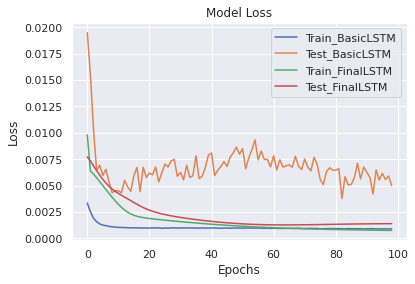

In [ ]:
for item in history_lstm.history.values():
        item.remove(item[0])
for item in history_final_lstm.history.values():
    item.remove(item[0])

plt.figure(figsize = (6,4))
plt.plot(history_lstm.history['loss'], label = 'Train_BasicLSTM')
plt.plot(history_lstm.history['val_loss'], label = 'Test_BasicLSTM')
plt.plot(history_final_lstm.history['loss'], label = 'Train_FinalLSTM')
plt.plot(history_final_lstm.history['val_loss'], label = 'Test_FinalLSTM')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
plt.show();

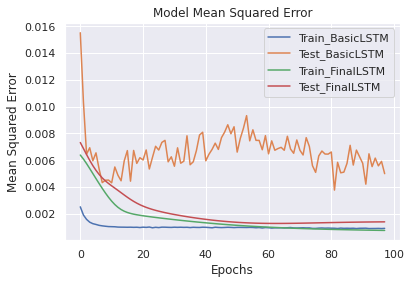

In [ ]:
for item in history_lstm.history.values():
        item.remove(item[0])
for item in history_final_lstm.history.values():
    item.remove(item[0])

plt.figure(figsize = (6,4))
plt.plot(history_lstm.history['mse'], label = 'Train_BasicLSTM')
plt.plot(history_lstm.history['val_mse'], label = 'Test_BasicLSTM')
plt.plot(history_final_lstm.history['mse'], label = 'Train_FinalLSTM')
plt.plot(history_final_lstm.history['val_mse'], label = 'Test_FinalLSTM')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend(loc = 'upper_left')
plt.show()